
# Graded Challenge 4

_Graded Challenge ini dibuat guna mengevaluasi pembelajaran pada Hacktiv8 Data Science Fulltime Program khususnya pada konsep Clustering._

# 1 - Perkenalan

Nama: Sri Wahyuni

Batch: FTDS-016-RMT

### Dataset

Dataset yang digunakan pada project ini adalah dataset `credit-card-information` dari database bernama `ftds-hacktiv8-project` yang diperoleh dari [Google BigQuery](https://console.cloud.google.com/bigquery?project=hacktiv8-yuni&ws=!1m10!1m4!4m3!1sbigquery-public-data!2scovid19_jhu_csse_eu!3ssummary!1m4!1m3!1shacktiv8-yuni!2sbquxjob_28c384bb_184935f8ffb!3sUS) klik untuk langsung menuju dataset. 

Data yang digunakan hanya data dengan `CUST_ID` yang bernilai genap.

### Query Google Cloud Platform

**SELECT** *  FROM `ftds-hacktiv8-project.phase1_ftds_016_rmt.credit-card-information`
**WHERE** MOD(CUST_ID, 2) =0;

### Latar Belakang

Marketing diperusahaan ingin meningkatkan kesadaran merek, keterlibatan, dan penjualan dengan kampanye promosi memperluas jangkauan. Salah satu cara sebelum melakukan kampanye promosi harus memahimi pelanggannya dengan cara membuat segmentasi konsumen. Segmentasi konsumen adalah proses membagi pelanggan menjadi kelompok-kelompok dengan kebutuhan, perilaku, atau karakteristik yang sama. Hal ini memungkinkan pemasar untuk menekankan pesan dan penawaran yang berbeda ke segmen yang berbeda Segmentasi seringkali didasarkan pada data demografis dan geografis; namun, data psikografik dan perilaku juga dapat digunakan untuk menentukan segmen pelanggan. [referensi](https://binus.ac.id/bandung/creativepreneurship/2021/11/08/segmentasi-konsumen/#:~:text=Segmentasi%20pelanggan%20adalah%20proses%20membagi,berbeda%20ke%20segmen%20yang%20berbeda.)

### Problem Statement

Mengolah data menggunakan metodologi unsupervised learning untuk mensegmentasi pelanggan dengan menemukan pola tertentu dengan harapan dapat menemukan beberapa karakteristik di antara setiap segmen pelanggan.


### Penjabaran Masalah

- Apakah credit limit mempengaruhi prilaku pembelian dan pembayaran?
- Tipe pembayaran apa yang paling banyak digunakan?
- Apakah minimum payment mempengaruhi tingkat pembayaran?
- Apakah tenure mempengaruhi balance, purchases_trx dan credit limit?
- Membuat kelompok atau cluster data dengan beberapa karakteristik untuk segmentasi konsumen
- Menemukan metode clustering yang paling optimal

### Tabel Informasi

Berikut ini adalah informasi dari setiap column. 
   <img src='https://i.ibb.co/2sbf0Js/P1-G4-Dataset-Information.png'>

# 2 - Import Libraris

Pada Project kali ini akan menggunakan library **Pandas**, **Numpy**, **Matplotlib**, **Seaborn** dan **Scikit-Learn**.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import yellowbrick.cluster
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, silhouette_samples

# 3 - Data Loading

Mengupload Dataset yang sudah diperoleh menjadai DataFrame

In [2]:
data = pd.read_csv(r'C:\Users\wSatrian\github-classroom\H8-Assignments-Bay\p1---ftds-016-rmt--g4-swhyuni\h8dsft_P1G4_Sri_Wahyuni.csv.csv')

Menampilkan 5 data teratas

In [3]:
data.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0      788    16.581535              0.125      200.0               0.0   
1     1902   943.584041              0.875      103.0             103.0   
2     2322     1.979916              0.125       80.0              80.0   
3     3426   461.455720              1.000      585.0             585.0   
4     3976  1053.594730              1.000     1450.0            1450.0   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                   200.0           0.0                0.125   
1                     0.0           0.0                0.125   
2                     0.0           0.0                0.125   
3                     0.0           0.0                0.125   
4                     0.0           0.0                0.125   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000                             0.125   
1                       0.125                             0.000   
2                       0.125                             0.000   
3                       0.125                             0.000   
4                       0.125                             0.000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                     0.0                 0              2        1200.0   
1                     0.0                 0              1        1000.0   
2                     0.0                 0              1        1500.0   
3                     0.0                 0              1        1000.0   
4                     0.0                 0              1        1500.0   

     PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0    0.000000               NaN               0.0       8  
1  215.325023        410.484825               0.0       8  
2    0.000000               NaN               0.0       8  
3  258.032630        151.696433               0.0       8  
4  397.090516        227.143184               0.0       8

Menampilkan 5 Data Terbawah

In [4]:
data.tail()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
4470     4630  1079.008102           1.000000       0.00              0.00   
4471     8614   809.582978           0.909091       0.00              0.00   
4472     4296  3386.490883           1.000000     560.98            427.22   
4473     4476  4840.545574           1.000000    1595.93           1595.93   
4474     3564  1977.007090           1.000000    1032.04            226.90   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
4470                    0.00   1259.571764             0.000000   
4471                    0.00   3819.672466             0.000000   
4472                  133.76   2008.153534             1.000000   
4473                    0.00   4359.325750             0.454545   
4474                  805.14   4335.919227             0.909091   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
4470                    0.000000                          0.000000   
4471                    0.000000                          0.000000   
4472                    0.727273                          0.363636   
4473                    0.454545                          0.000000   
4474                    0.090909                          0.818182   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
4470                0.545455                 9              0        1200.0   
4471                0.545455                 7              0        4150.0   
4472                0.545455                 9             20       10100.0   
4473                0.545455                17             25        6000.0   
4474                0.545455                21             17        4000.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
4470  1379.635287        271.364415          0.090909      11  
4471  4372.148648        241.645387          0.090909      11  
4472  1039.000037        886.050237          0.000000      11  
4473   905.844846       2376.919568          0.090909      11  
4474  3056.424974        910.707525          0.090909      11

Mengecek informasi Data

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4475 entries, 0 to 4474
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           4475 non-null   int64  
 1   BALANCE                           4475 non-null   float64
 2   BALANCE_FREQUENCY                 4475 non-null   float64
 3   PURCHASES                         4475 non-null   float64
 4   ONEOFF_PURCHASES                  4475 non-null   float64
 5   INSTALLMENTS_PURCHASES            4475 non-null   float64
 6   CASH_ADVANCE                      4475 non-null   float64
 7   PURCHASES_FREQUENCY               4475 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        4475 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  4475 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            4475 non-null   float64
 11  CASH_ADVANCE_TRX                  4475 non-null   int64  
 12  PURCHA

Dari data tersebut diperoleh beberapa informasi:

- Terdiri dari 4475 **bariS**
- Terdiri dari 18 **kolom**
- Terdapat 14 data dengan tipe **float**
- Terdapat 4 data dengan tipe **integer**
- Terdapat Missing value pada kolom `MINIMUM_PAYMENTS` dan `CREDIT_LIMIT`. akan kita cek di **EDA** untuk penentuan handling di **preprocessing**

In [6]:
data.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    158
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

Dari data sersebut terdapat Missing Value pada kolom `MINIMUM_PAYMENT` dan `CREDIT_LIMIT`

Mengecek data duplicate

In [7]:
data.duplicated().sum()

0

Tidak terdapat data duplikat

In [8]:
data.describe()

CUST_ID       BALANCE  BALANCE_FREQUENCY     PURCHASES  \
count  4475.000000   4475.000000        4475.000000   4475.000000   
mean   4476.000000   1565.743939           0.877608   1003.158324   
std    2583.931114   2091.205727           0.235604   2210.812899   
min       2.000000      0.000000           0.000000      0.000000   
25%    2239.000000    132.536353           0.888889     40.065000   
50%    4476.000000    874.905296           1.000000    362.480000   
75%    6713.000000   2058.519163           1.000000   1122.640000   
max    8950.000000  19043.138560           1.000000  49039.570000   

       ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  CASH_ADVANCE  \
count       4475.000000             4475.000000   4475.000000   
mean         588.504849              415.025075    973.453671   
std         1666.500287              927.360842   2133.464502   
min            0.000000                0.000000      0.000000   
25%            0.000000                0.000000      0.000000   
50%           29.990000               89.450000      0.000000   
75%          580.320000              484.255000   1098.569962   
max        40761.250000            22500.000000  29282.109150   

       PURCHASES_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY  \
count          4475.000000                 4475.000000   
mean              0.490122                    0.202614   
std               0.399874                    0.298502   
min               0.000000                    0.000000   
25%               0.083333                    0.000000   
50%               0.500000                    0.083333   
75%               0.916667                    0.333333   
max               1.000000                    1.000000   

       PURCHASES_INSTALLMENTS_FREQUENCY  CASH_ADVANCE_FREQUENCY  \
count                       4475.000000             4475.000000   
mean                           0.364989                0.134156   
std                            0.397336                0.199221   
min                            0.000000                0.000000   
25%                            0.000000                0.000000   
50%                            0.166667                0.000000   
75%                            0.750000                0.181818   
max                            1.000000                1.166667   

       CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT      PAYMENTS  \
count       4475.000000    4475.000000   4474.000000   4475.000000   
mean           3.196425      14.490503   4494.020175   1726.212274   
std            6.500169      24.156038   3668.535689   2961.258570   
min            0.000000       0.000000    150.000000      0.000000   
25%            0.000000       1.000000   1500.000000    390.206371   
50%            0.000000       7.000000   3000.000000    831.048408   
75%            4.000000      17.000000   6000.000000   1895.959003   
max          110.000000     358.000000  30000.000000  46930.598240   

       MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count       4317.000000       4475.000000  4475.000000  
mean         854.429538          0.157206    11.516425  
std         2306.411178          0.295869     1.347819  
min            0.037744          0.000000     6.000000  
25%          169.814310          0.000000    12.000000  
50%          309.854995          0.000000    12.000000  
75%          830.395060          0.166667    12.000000  
max        61031.618600          1.000000    12.000000

Berdasarkan describe data diatas diperoleh beberapa informasi:
- `CUST_ID` merupakan ID dari setiap pengguna dimana angka tersebut hanya sebuah nomer informasi pengguna sehingga tidak akan digunakan.
- Data kebanyakan terdistribusi tidak normal dilihat banyak nilai mean lebih besar atau jauh berbeda dengan nilai median
- Banyak data yang memiliki nilai minimun 0 yang artinya banyak data yang tidak melakukan transaksi menggunakan kartu kredit.

Menduplicate DataFrame 

In [9]:
data_duplicate = data.copy()

Drop Kolom `CUST_ID`

In [10]:
data = data.drop(columns=['CUST_ID'])

# 4 - Exploratory Data Analysis (EDA)

### Minimum Payments

In [11]:
data[data.MINIMUM_PAYMENTS.isna()]

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       16.581535           0.125000     200.00              0.00   
2        1.979916           0.125000      80.00             80.00   
6     2730.843802           1.000000    2900.00           2900.00   
8       18.885677           0.375000      57.00             57.00   
27       0.000000           0.000000      66.75              0.00   
...           ...                ...        ...               ...   
4049  2242.311686           1.000000     437.00             97.00   
4087  1948.434315           1.000000     324.30            324.30   
4091  4618.091584           1.000000     541.68            541.68   
4144    27.716642           0.100000       0.00              0.00   
4293   116.172752           0.111111       0.00              0.00   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                     200.00      0.000000             0.125000   
2                       0.00      0.000000             0.125000   
6                       0.00      0.000000             0.125000   
8                       0.00      0.000000             0.125000   
27                     66.75      0.000000             0.250000   
...                      ...           ...                  ...   
4049                  340.00    184.648692             0.333333   
4087                    0.00   1468.083560             0.166667   
4091                    0.00   3580.753362             0.166667   
4144                    0.00    480.104401             0.000000   
4293                    0.00   1867.994674             0.000000   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.125000   
2                       0.125000                          0.000000   
6                       0.125000                          0.000000   
8                       0.125000                          0.000000   
27                      0.000000                          0.250000   
...                          ...                               ...   
4049                    0.083333                          0.333333   
4087                    0.166667                          0.000000   
4091                    0.166667                          0.000000   
4144                    0.000000                          0.000000   
4293                    0.000000                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1200.0   
2                   0.000000                 0              1        1500.0   
6                   0.000000                 0              1        2900.0   
8                   0.000000                 0              1        1500.0   
27                  0.000000                 0              3        4000.0   
...                      ...               ...            ...           ...   
4049                0.166667                 2              5        2400.0   
4087                0.166667                 4              4        5000.0   
4091                0.166667                 2              2        8500.0   
4144                0.100000                 1              0        5000.0   
4293                0.111111                 6              0        3000.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0          0.0               NaN               0.0       8  
2          0.0               NaN               0.0       8  
6          0.0               NaN               0.0       8  
8          0.0               NaN               0.0       8  
27         0.0               NaN               0.0      12  
...        ...               ...               ...     ...  
4049       0.0               NaN               0.0      12  
4087       0.0               NaN               0.0      12  
4091       0.0               NaN     

In [12]:
data[data.MINIMUM_PAYMENTS.isna()].describe()

BALANCE  BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES  \
count   158.000000         158.000000   158.000000        158.000000   
mean    636.655038           0.400582   405.383987        257.177152   
std    1284.412605           0.408031   887.213931        719.794620   
min       0.000000           0.000000     0.000000          0.000000   
25%       0.651846           0.090909     0.000000          0.000000   
50%      23.278859           0.181818   131.970000          0.000000   
75%     435.203656           1.000000   387.692500        205.255000   
max    6059.861762           1.000000  7597.090000       6761.290000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count              158.000000    158.000000           158.000000   
mean               148.206835    608.922824             0.341530   
std                338.273015   1199.353420             0.379666   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.000000   
50%                  0.000000      0.000000             0.166667   
75%                151.710000    552.994057             0.645833   
max               2959.240000   6523.780195             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                  158.000000                        158.000000   
mean                     0.126497                          0.235730   
std                      0.267597                          0.349763   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.000000                          0.000000   
75%                      0.089015                          0.333333   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count              158.000000        158.000000     158.000000    158.000000   
mean                 0.077138          1.677215       6.075949   3663.291139   
std                  0.150413          3.580323       9.582059   2952.109349   
min                  0.000000          0.000000       0.000000    500.000000   
25%                  0.000000          0.000000       0.000000   1500.000000   
50%                  0.000000          0.000000       2.000000   2950.000000   
75%                  0.097727          1.000000       8.000000   4500.000000   
max                  1.000000         21.000000      60.000000  19500.000000   

          PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT      TENURE  
count   158.000000               0.0             158.0  158.000000  
mean    109.310938               NaN               0.0   11.139241  
std     514.858176               NaN               0.0    1.789810  
min       0.000000               NaN               0.0    6.000000  
25%       0.000000               NaN               0.0   12.000000  
50%       0.000000               NaN               0.0   12.000000  
75%       0.000000               NaN               0.0   12.000000  
max    6112.512276               NaN               0.0   12.000000

Berdasarkan data describe kolom `MINIMUM_PAYMENTS` yang tidak ada nilainya adalah pengguna yang jarang menggunakan kartu kredit dilihat dari nilai minimum `0` hampir disemua kolom dan jika dilihat berdasarkan kolom `PURCHASES_TRX` rata-ratanya hanya 6x. Karena data yang hilang cukup banyak yaitu **158** apabila dihapus akan kehilangan banyak data sehingga pada **preprocessing** nilai yang hilang akan di ganti dengan nilai median.

### Credit Limit

In [13]:
data[data.CREDIT_LIMIT.isna()]

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
3843  18.400472           0.166667        0.0               0.0   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
3843                     0.0    186.853063                  0.0   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
3843                         0.0                               0.0   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
3843                0.166667                 1              0           NaN   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
3843  9.040017         14.418723               0.0       6

Sepertinya data yang hilang adalah data yang belum pernah menggunakan kartu kreditnya dilihat tidak adanya data pembelian. Karena datanya hanya 1 maka akan di hilangkan pada tahap **preprocessing**.

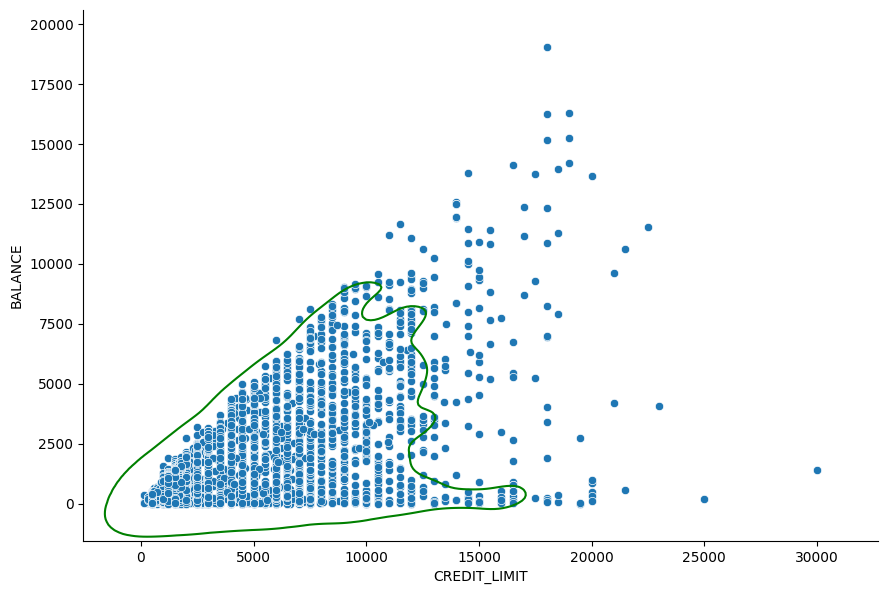

In [14]:
#plot relation credit limit with balance
sns.pairplot(data=data, x_vars='CREDIT_LIMIT', y_vars='BALANCE', 
             height=6, aspect=1.5).map(sns.kdeplot, levels=1, color='green');

Dari plot diatas menunjukan bawah credit limit paling banyak dibawah 14.000 dengan balance dibawah 8.000

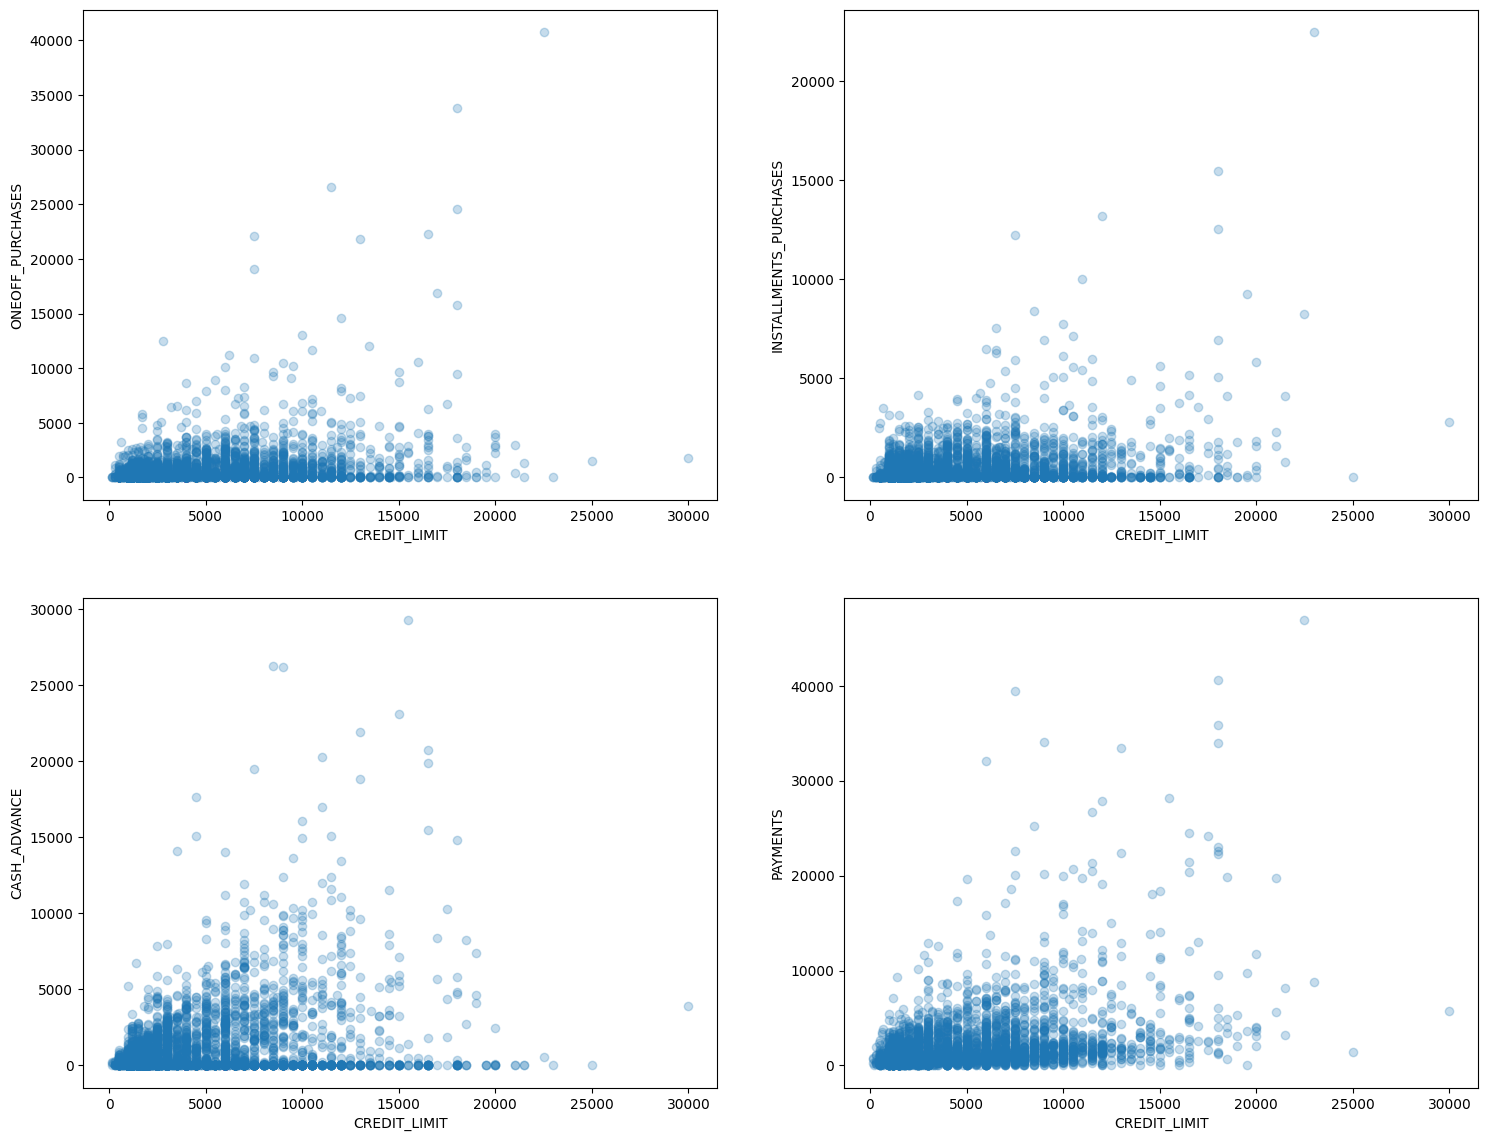

In [15]:
# creating plot
plt.figure(figsize=(18, 14))
columns=['ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES','CASH_ADVANCE','PAYMENTS']
n=1
for x in columns:
    plt.subplot(2,2,n)
    plt.scatter(data['CREDIT_LIMIT'], data[x], alpha=0.25)
    plt.xlabel('CREDIT_LIMIT')
    plt.ylabel(x)
    n=n+1
plt.ticklabel_format(useOffset=False, style='plain')
plt.show()

### Purchases

In [16]:
#displaying purchase frequency above 0.5
print(len(data[data['PURCHASES_INSTALLMENTS_FREQUENCY'] > .5]), 'PURCHASES_INSTALLMENTS_FREQUENCY')
print(len(data[data['ONEOFF_PURCHASES_FREQUENCY'] > .5]), 'ONEOFF_PURCHASES_FREQUENCY')

1544 PURCHASES_INSTALLMENTS_FREQUENCY
672 ONEOFF_PURCHASES_FREQUENCY


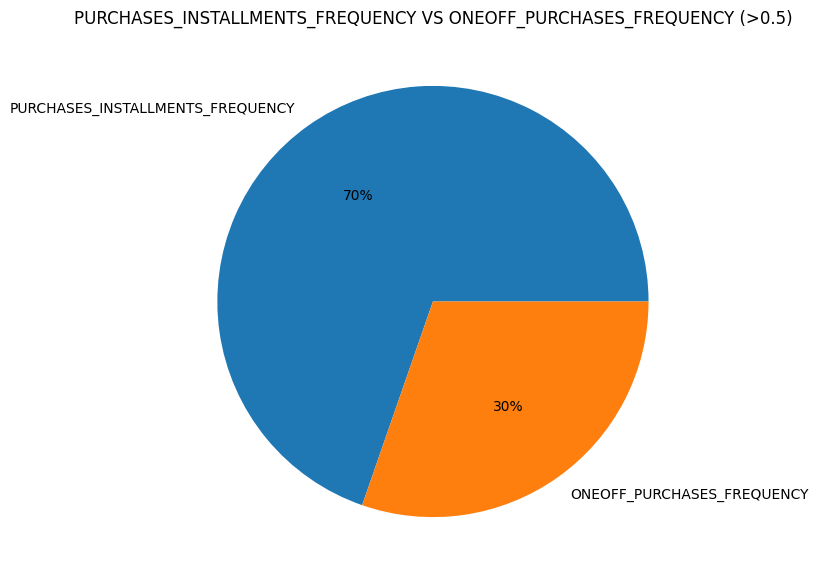

In [17]:
#pie plot for installment vs oneoff
plt.figure(figsize=(7,7))
plt.pie([len(data[data['PURCHASES_INSTALLMENTS_FREQUENCY'] > .5]),
         len(data[data['ONEOFF_PURCHASES_FREQUENCY'] > .5])], 
        labels = ['PURCHASES_INSTALLMENTS_FREQUENCY', 
                  'ONEOFF_PURCHASES_FREQUENCY'], 
        autopct='%.0f%%')
plt.title('PURCHASES_INSTALLMENTS_FREQUENCY VS ONEOFF_PURCHASES_FREQUENCY (>0.5)');

Pengguna lebih banyak melakukan transaksi dengan pembayaran cicilan dibandingkan pembayaran sekali bayar

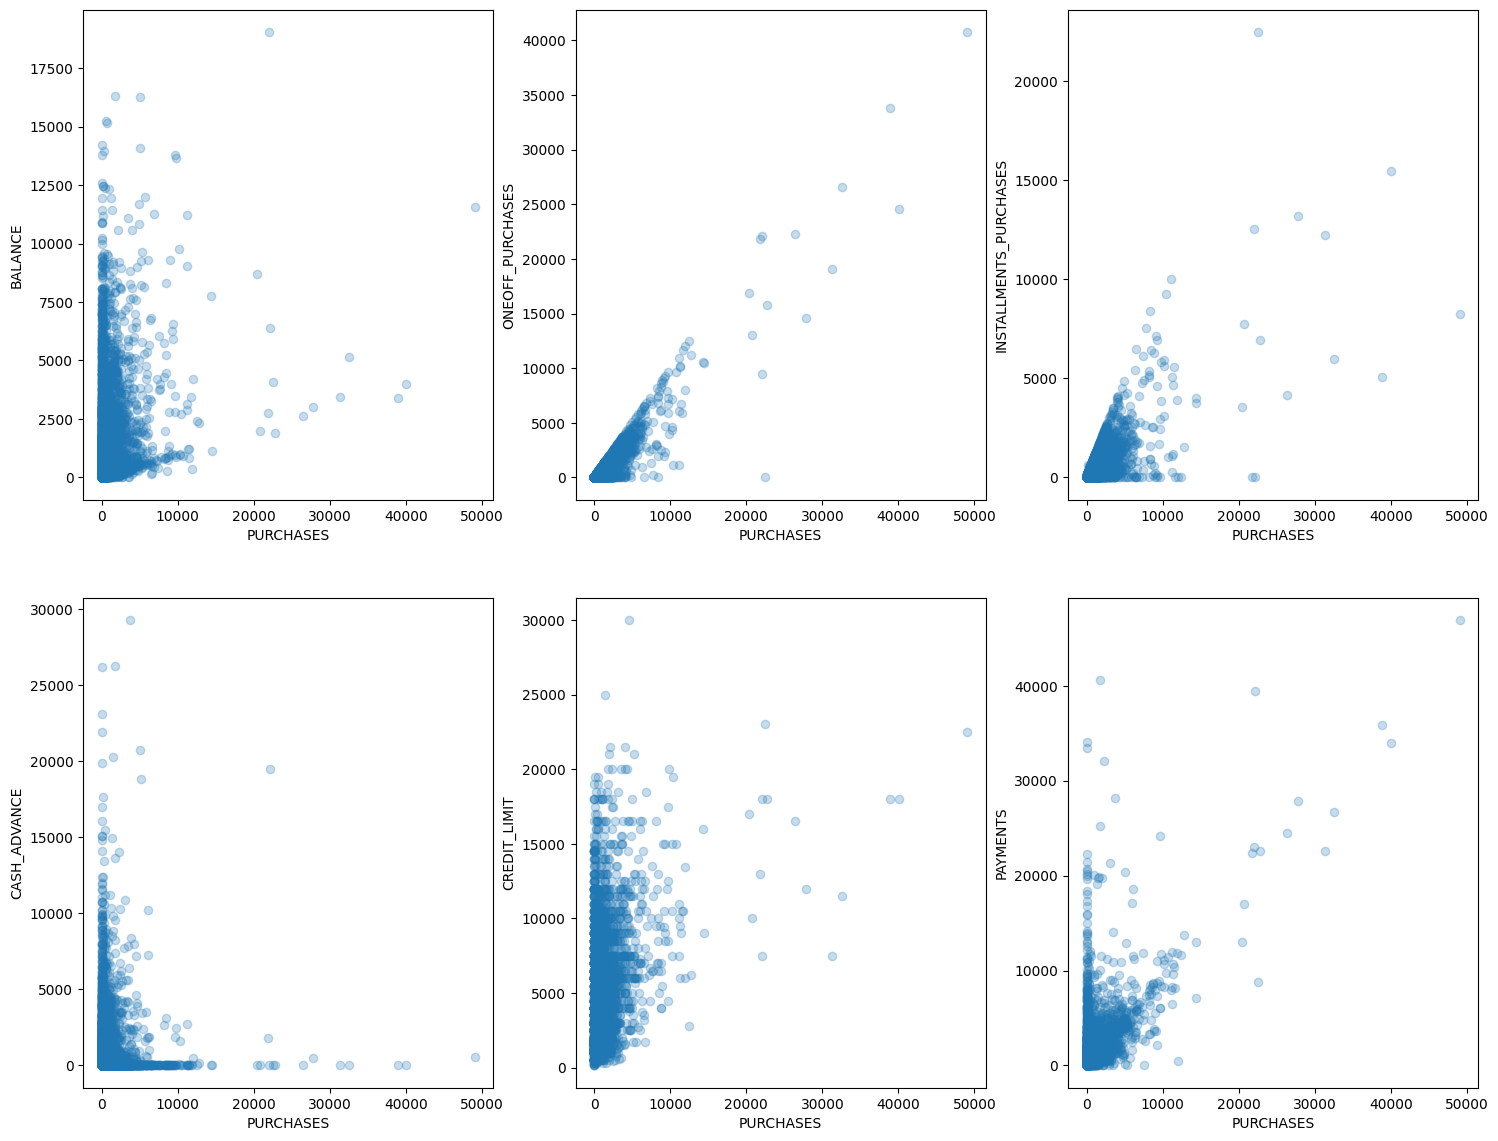

In [18]:
# creating plot analysis
plt.figure(figsize=(18, 14))
columns=['BALANCE','ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES','CASH_ADVANCE','CREDIT_LIMIT','PAYMENTS']
n=1
for x in columns:
    plt.subplot(2,3,n)
    plt.scatter(data['PURCHASES'], data[x], alpha=0.25)
    plt.xlabel('PURCHASES')
    plt.ylabel(x)
    n=n+1
plt.ticklabel_format(useOffset=False, style='plain')
plt.show()

- Hampir semua pengguna melakukan pembelian hingga 10.000 
- Balance yang dimiliki pengguna hingga 10.000
- Pengguna yang melakukan pembelian dengan sekali bayar hingga 10.000 sedangkan yang menggunakan cicilan hingga 5.000
- payments dan credit limit sama yaitu hampir 20.000

### Payments

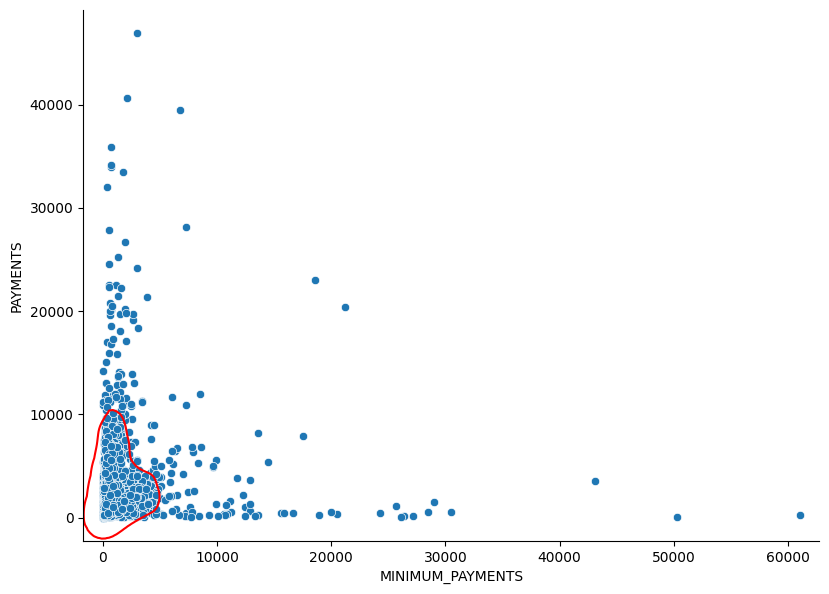

In [19]:
#pair plot for payments vs minimum payments
sns.pairplot(data=data, y_vars='PAYMENTS', x_vars='MINIMUM_PAYMENTS', 
             height=6, aspect=1.4).map(sns.kdeplot, levels=1, color='red');

Pembayaran yang dilakukan pengguna paling banyak dibawah 10000 dengan minimum pembayaran dibawah 5000

### Balance

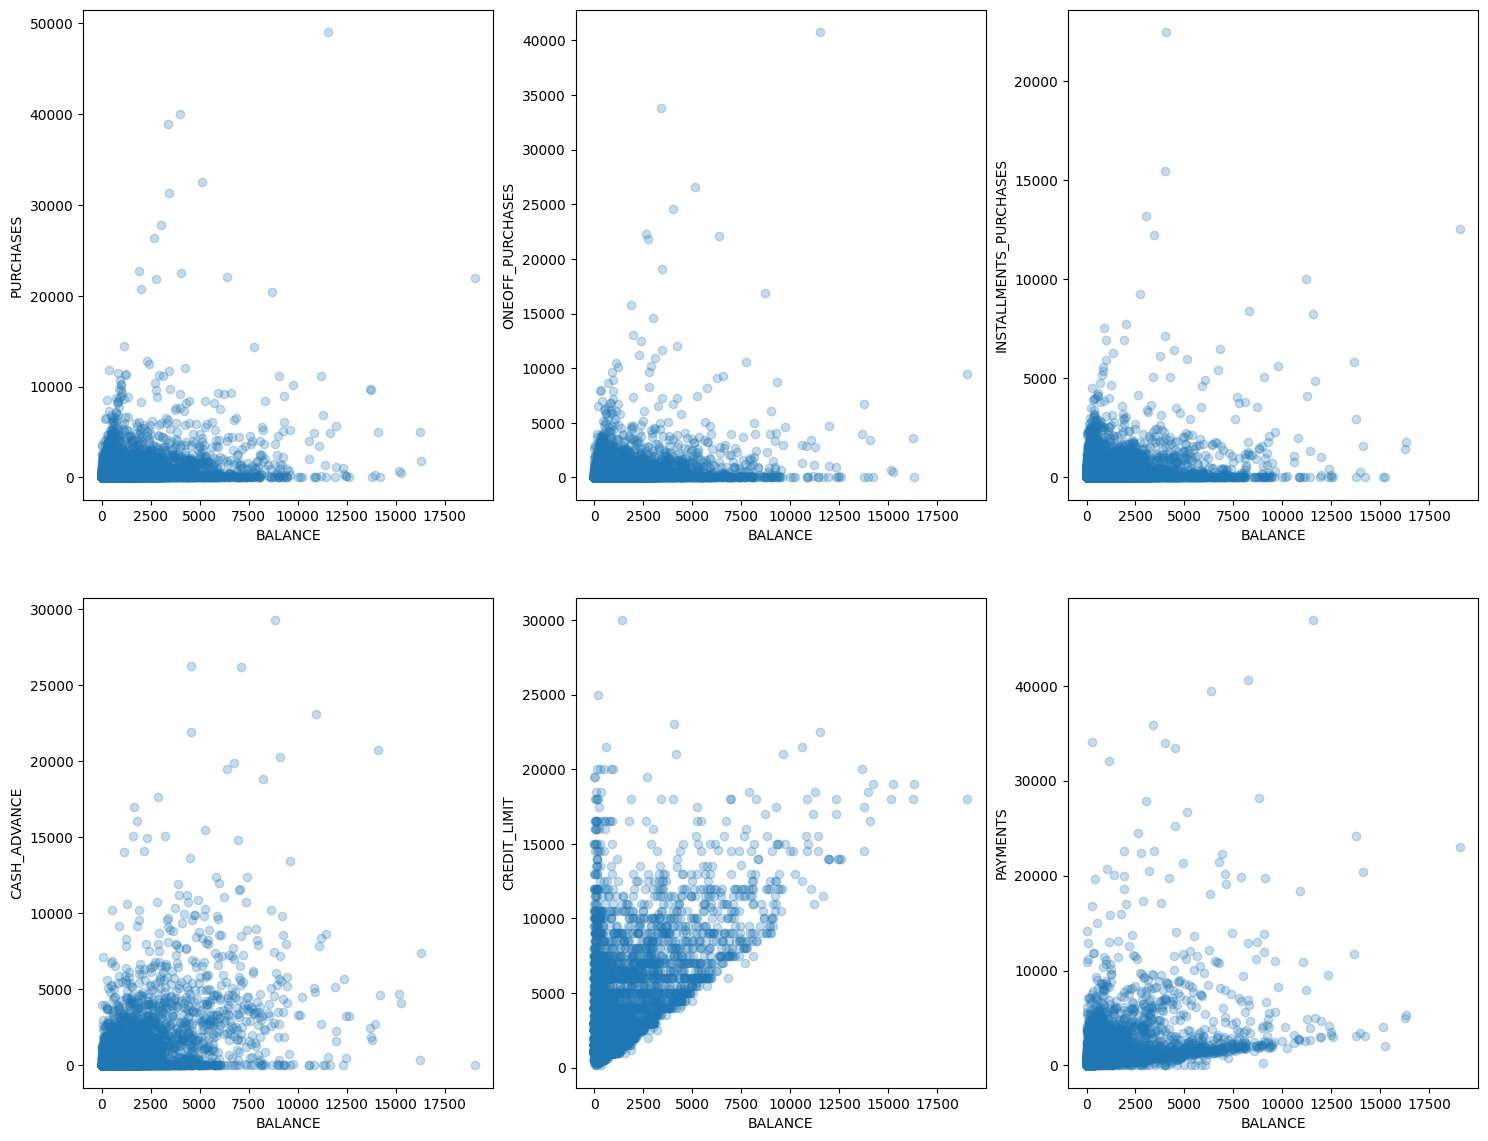

In [20]:
# creating plot analysis
plt.figure(figsize=(18, 14))
columns=['PURCHASES','ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES','CASH_ADVANCE','CREDIT_LIMIT','PAYMENTS']
n=1
for x in columns:
    plt.subplot(2,3,n)
    plt.scatter(data['BALANCE'], data[x], alpha=0.25)
    plt.xlabel('BALANCE')
    plt.ylabel(x)
    n=n+1
plt.ticklabel_format(useOffset=False, style='plain')
plt.show()

- Hampir semua pengguna memiliki balance dibawah 10.000
- Pembayaran yang paling banyak dibawah 8.000
- Pembelian sekali banyar dibawah 8.000
- pembelian dengan cicilan dibawah 5.000
- Semakin tinggi balance maka semakin tinggi juga credit limit
- pembayaran paling banyak dibawah 10.000


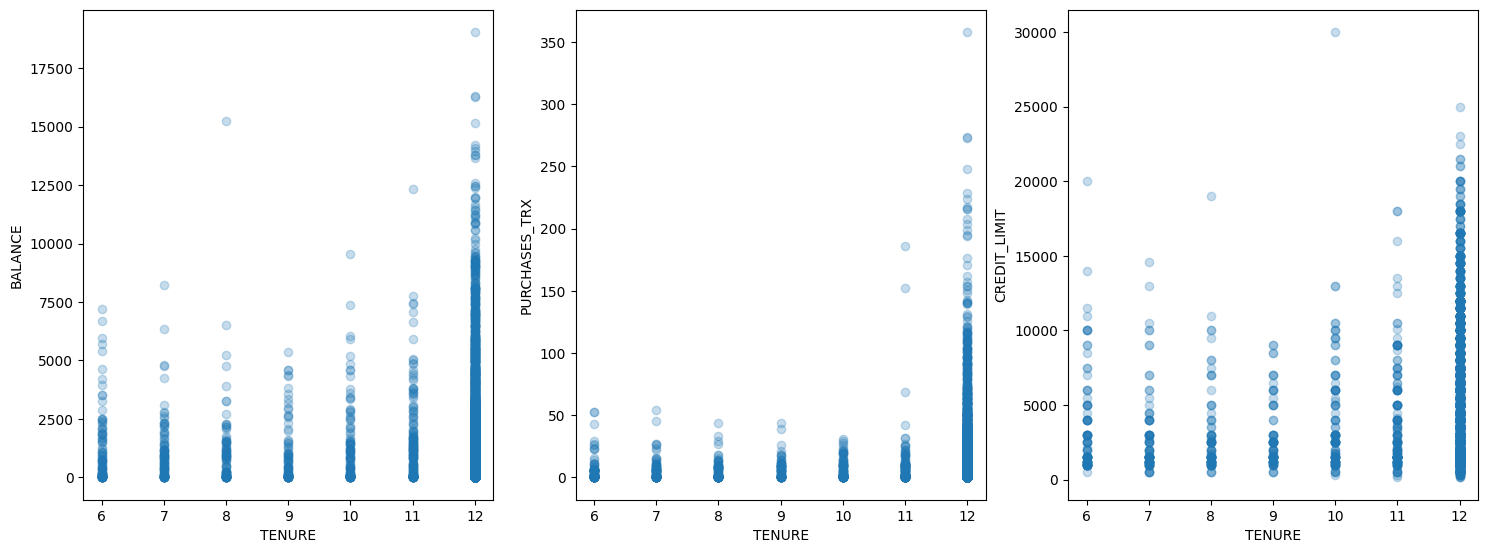

In [21]:
# creating plot analysis
plt.figure(figsize=(18, 14))
columns=['BALANCE','PURCHASES_TRX','CREDIT_LIMIT']
n=1
for x in columns:
    plt.subplot(2,3,n)
    plt.scatter(data['TENURE'], data[x], alpha=0.25)
    plt.xlabel('TENURE')
    plt.ylabel(x)
    n=n+1
plt.ticklabel_format(useOffset=False, style='plain')
plt.show()

Banyak pengguna yang memiliki tenur lama (12 bln) namun hal ini sepertinya mempengaruhi jumlah limit kredit yang semakin tinggi disusul dengan pembelian yang tinggi

### Distribusi data

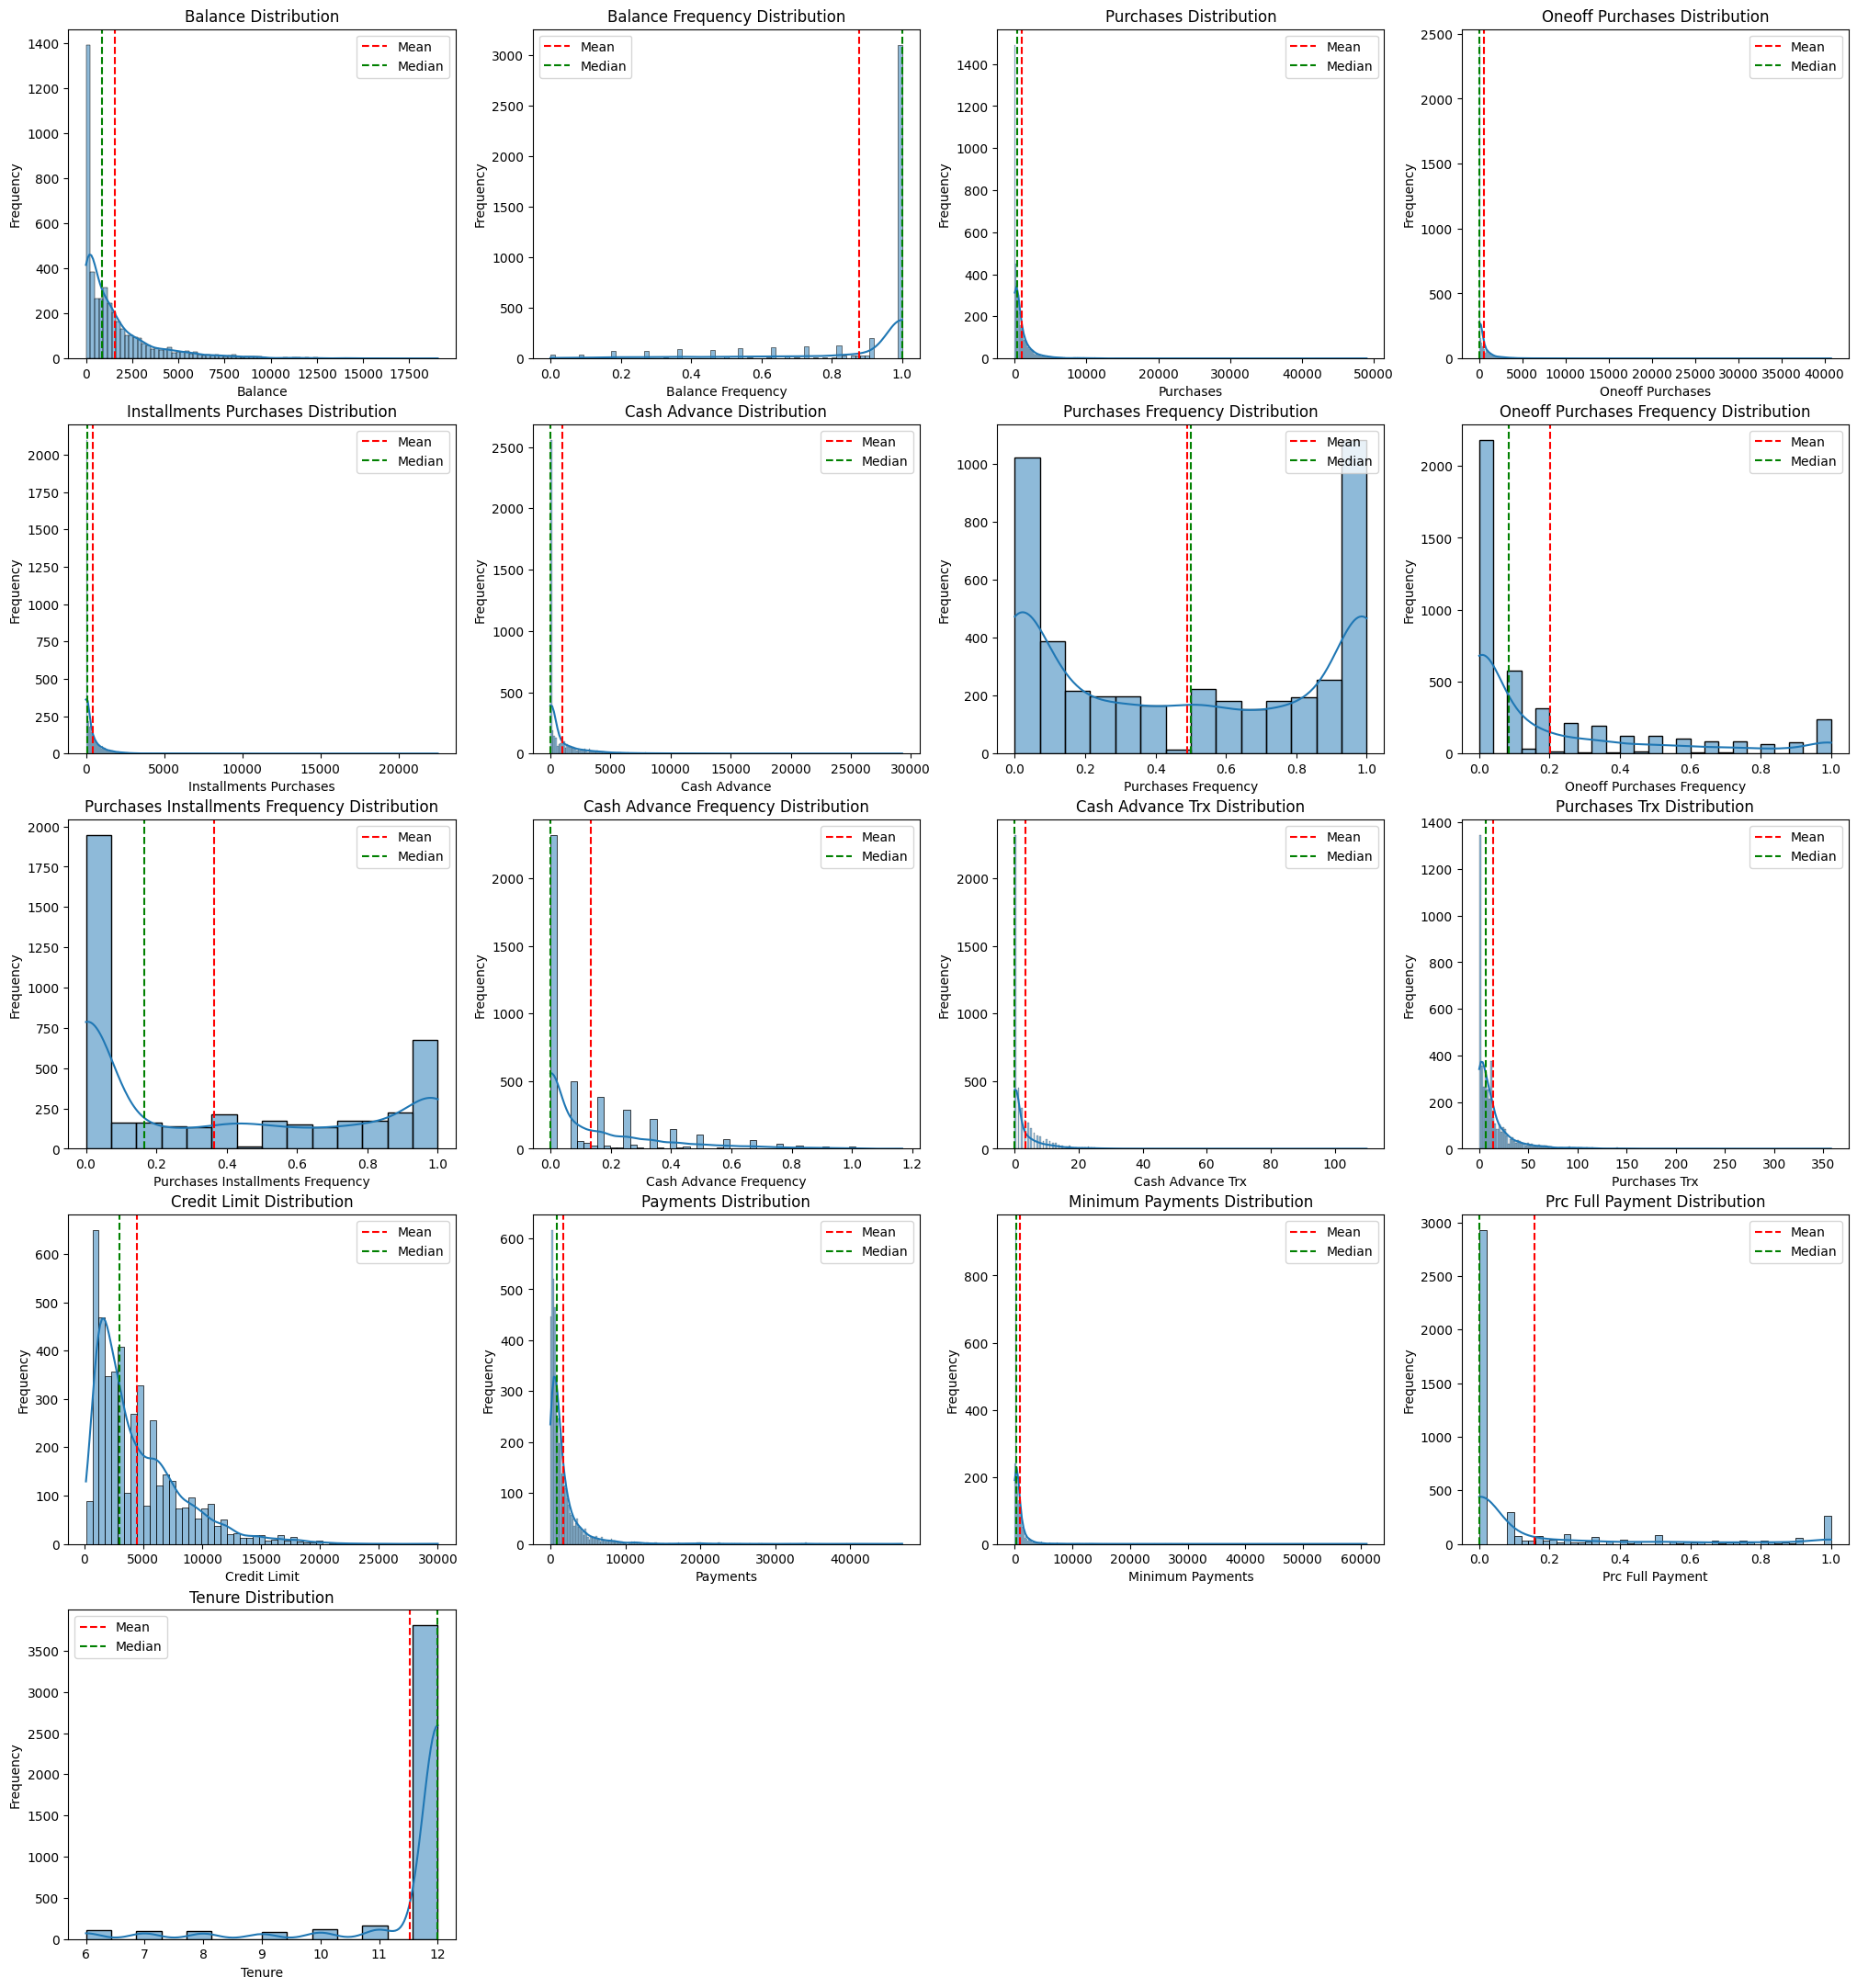

In [22]:
plt.figure(figsize=(25, 27))
for col in data.columns:
    plt.subplot(5, 4, data.columns.get_loc(col) + 1)
    sns.histplot(x=col, data=data, kde=True)
    plt.axvline(x=data[col].mean(), color='red', linestyle='--', label='Mean')
    plt.axvline(x=data[col].median(), color='green', linestyle='--', label='Median')
    plt.title(f"{col.replace('_', ' ').title()} Distribution")
    plt.xlabel(col.replace('_', ' ').title())
    plt.ylabel('Frequency')
    plt.legend()
plt.show()

Hampir semua data adalah data yang tidak terdistribusi normal atau memiliki skewness dan memiliki banyak outlier.

### Corelation Matrix

<AxesSubplot: >

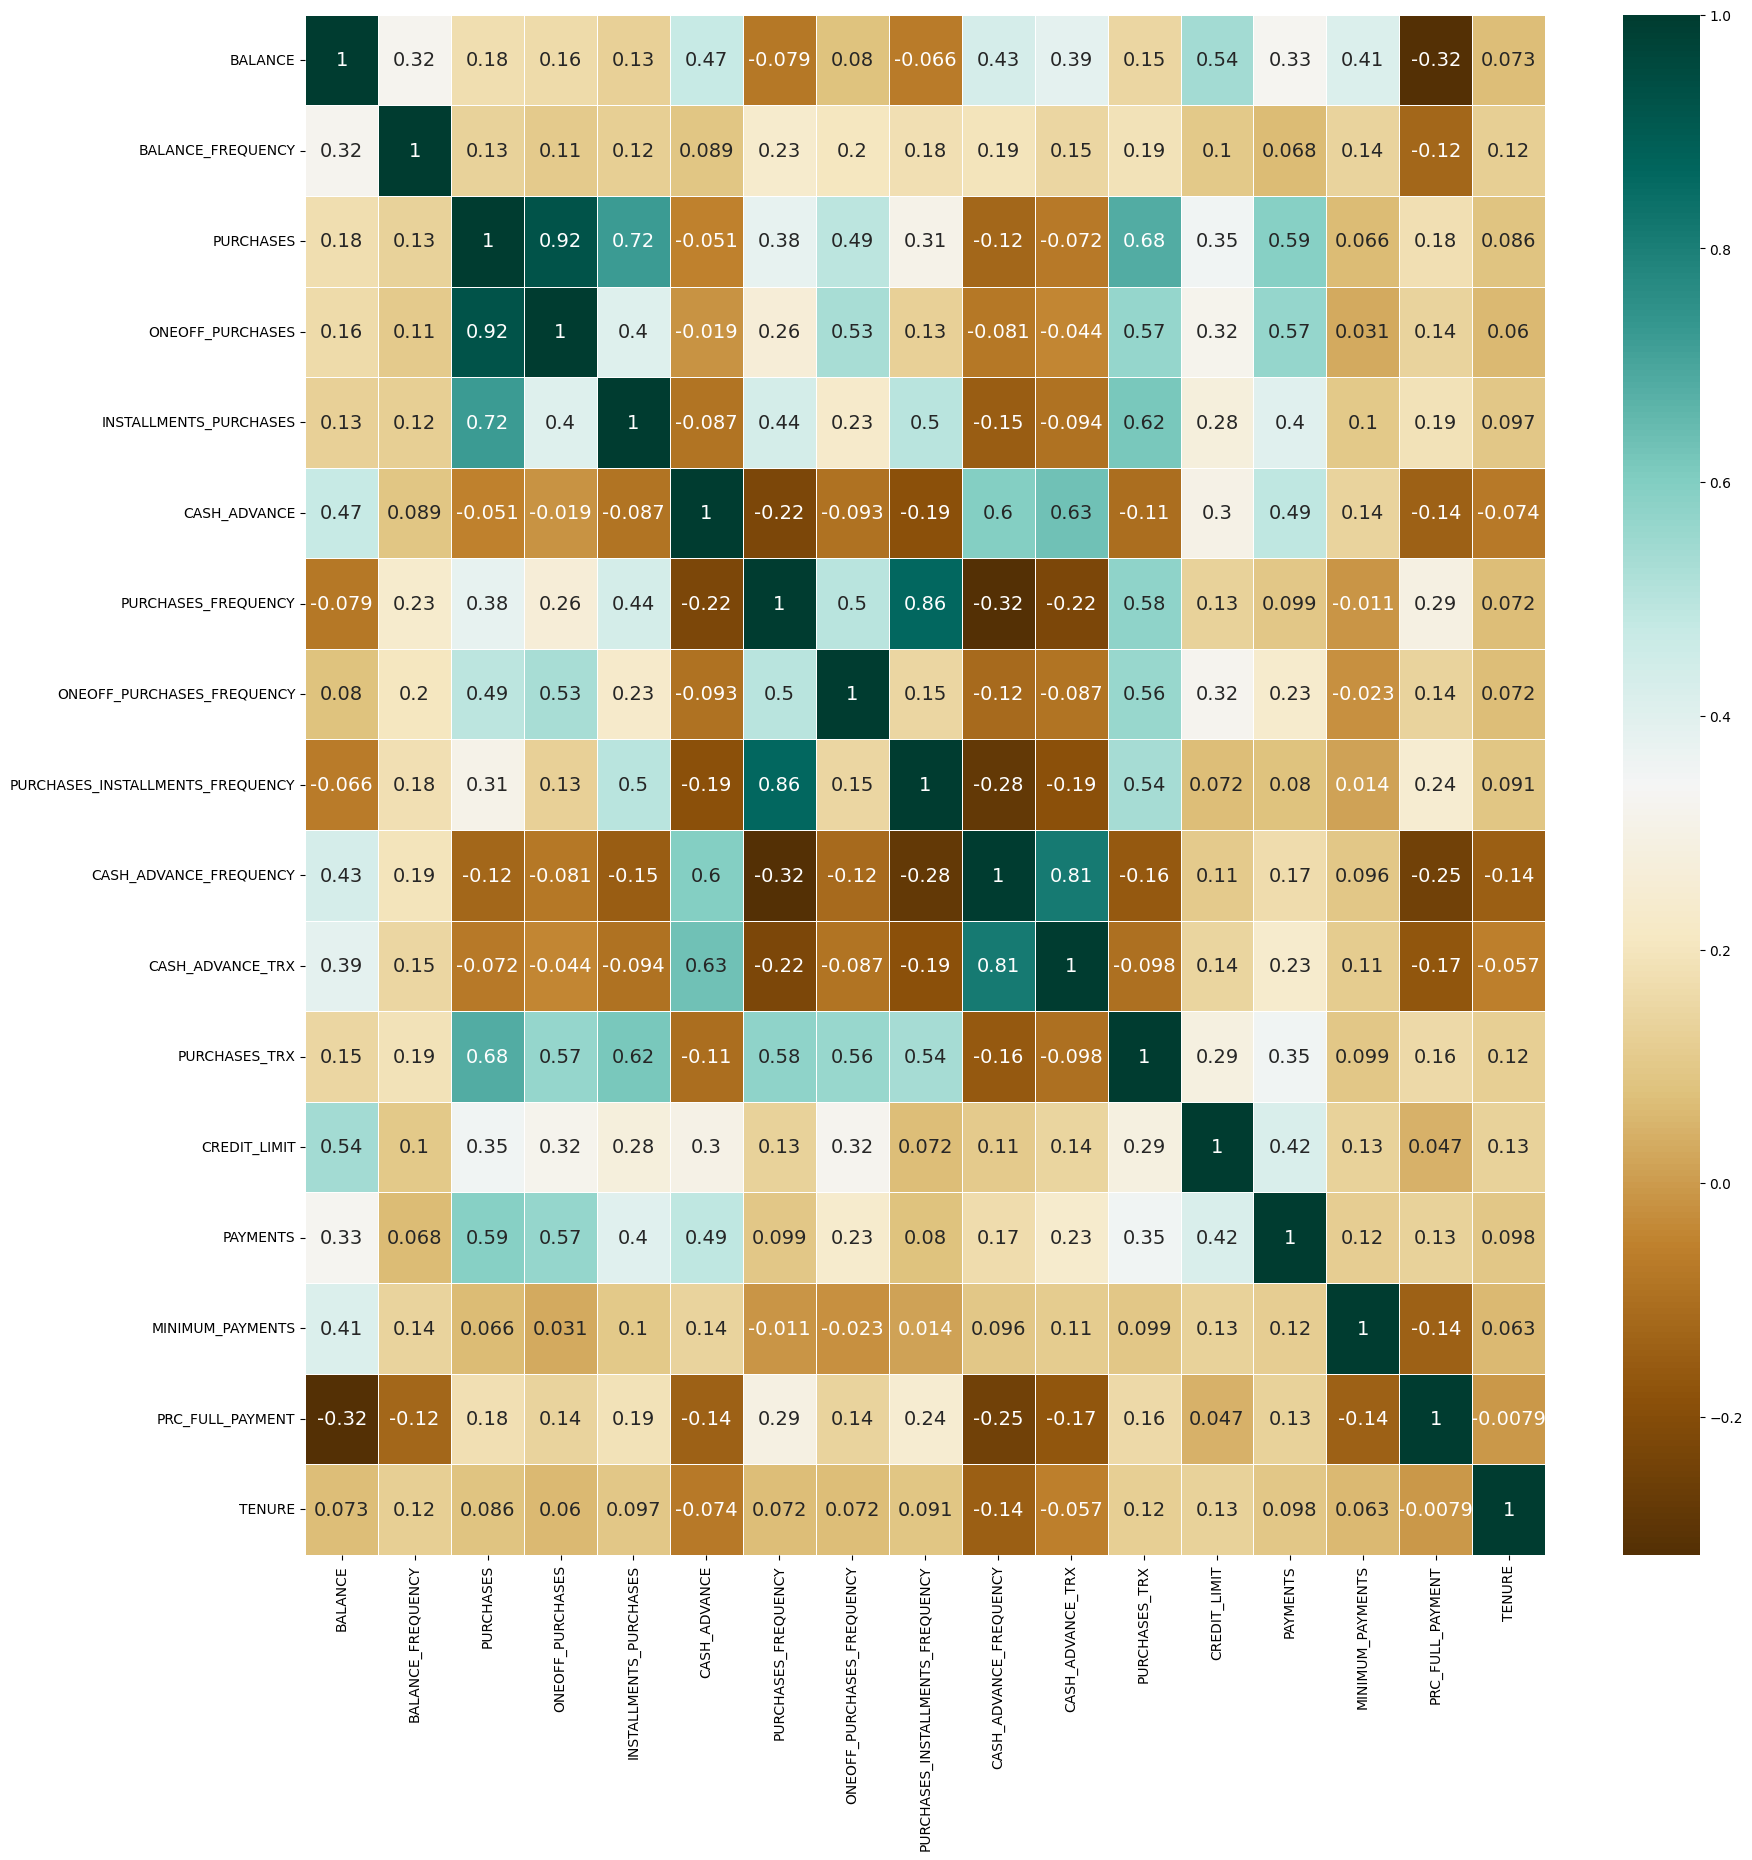

In [23]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(method='pearson'),
                cmap = 'BrBG',
                linewidths= .5,
                annot = True,
                annot_kws={'size':14})

# 5 - Data Preprocessing

### Memisahkan Data untuk Model Inference

Dikarenakan memiliki keterbatasan data sehingga kita akan memisahkan model inference yang nantinya akan digunakan untuk test model.

In [24]:
data_inf = data.sample(10, random_state=22)
data_inf

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
1025   312.636004           1.000000    3866.29            808.12   
3191   360.671491           1.000000    3956.64              0.00   
1666    30.692503           0.454545     205.06              0.00   
1898  2817.590920           1.000000      37.92              0.00   
3574  7803.071972           1.000000    1000.55              0.00   
1487    64.907748           0.727273     547.28            130.00   
4294  1362.418281           1.000000    1477.44            900.00   
2121   284.433780           0.363636     212.92              0.00   
3448  8040.732429           1.000000       0.00              0.00   
2332   772.647723           0.875000       0.00              0.00   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
1025                 3058.17      0.000000             1.000000   
3191                 3956.64    148.682192             1.000000   
1666                  607.76      0.000000             0.916667   
1898                   37.92      0.000000             0.166667   
3574                 1000.55   1490.239239             1.000000   
1487                  417.28      0.000000             0.333333   
4294                  577.44    451.968387             1.000000   
2121                  212.92      0.000000             0.833333   
3448                    0.00   3500.334072             0.000000   
2332                    0.00    970.371120             0.000000   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
1025                    1.000000                          1.000000   
3191                    0.000000                          1.000000   
1666                    0.000000                          1.000000   
1898                    0.000000                          0.166667   
3574                    0.000000                          1.000000   
1487                    0.083333                          0.250000   
4294                    0.111111                          0.888889   
2121                    0.000000                          0.833333   
3448                    0.000000                          0.000000   
2332                    0.000000                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
1025                0.000000                 0             95        7500.0   
3191                0.083333                 1             12        4500.0   
1666                0.000000                 0             35        4500.0   
1898                0.000000                 0              2        3000.0   
3574                0.333333                 6             35        8000.0   
1487                0.000000                 0              4        2500.0   
4294                0.111111                 1             10        1500.0   
2121                0.000000                 0             15        1500.0   
3448                0.333333                21              0       12000.0   
2332                0.125000                 1              0        2500.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
1025  3688.890803        190.886140              0.75      12  
3191  4013.483114       3662.236048              0.25      12  
1666   163.982192         55.660981              0.00      12  
1898   755.313452       1167.316335              0.00      12  
3574  3478.320794       2722.218432              0.00      12  
1487  1095.179494        126.509061              1.00      12  
4294   559.095981       1058.844790              0.00       9  
2121  1202.791804        150.107024              0.00      12  
3448  2709.478892       2044.554634              0.00      12  
2332   125.862157        209.002905              0.00       8

selanjutnya meremove dari inference dari dataset

In [25]:
data_train_test = data.drop(data_inf.index)
data_train_test

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       16.581535           0.125000     200.00              0.00   
1      943.584041           0.875000     103.00            103.00   
2        1.979916           0.125000      80.00             80.00   
3      461.455720           1.000000     585.00            585.00   
4     1053.594730           1.000000    1450.00           1450.00   
...           ...                ...        ...               ...   
4470  1079.008102           1.000000       0.00              0.00   
4471   809.582978           0.909091       0.00              0.00   
4472  3386.490883           1.000000     560.98            427.22   
4473  4840.545574           1.000000    1595.93           1595.93   
4474  1977.007090           1.000000    1032.04            226.90   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                     200.00      0.000000             0.125000   
1                       0.00      0.000000             0.125000   
2                       0.00      0.000000             0.125000   
3                       0.00      0.000000             0.125000   
4                       0.00      0.000000             0.125000   
...                      ...           ...                  ...   
4470                    0.00   1259.571764             0.000000   
4471                    0.00   3819.672466             0.000000   
4472                  133.76   2008.153534             1.000000   
4473                    0.00   4359.325750             0.454545   
4474                  805.14   4335.919227             0.909091   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.125000   
1                       0.125000                          0.000000   
2                       0.125000                          0.000000   
3                       0.125000                          0.000000   
4                       0.125000                          0.000000   
...                          ...                               ...   
4470                    0.000000                          0.000000   
4471                    0.000000                          0.000000   
4472                    0.727273                          0.363636   
4473                    0.454545                          0.000000   
4474                    0.090909                          0.818182   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1200.0   
1                   0.000000                 0              1        1000.0   
2                   0.000000                 0              1        1500.0   
3                   0.000000                 0              1        1000.0   
4                   0.000000                 0              1        1500.0   
...                      ...               ...            ...           ...   
4470                0.545455                 9              0        1200.0   
4471                0.545455                 7              0        4150.0   
4472                0.545455                 9             20       10100.0   
4473                0.545455                17             25        6000.0   
4474                0.545455                21             17        4000.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0        0.000000               NaN          0.000000       8  
1      215.325023        410.484825          0.000000       8  
2        0.000000               NaN          0.000000       8  
3      258.032630        151.696433          0.000000       8  
4      397.090516        227.143184          0.000000       8  
...           ...               ...               ...     ...  
4470  1379.635287        271.364415          0.090909      11  
4471  4372.148648        241.645387          0.090909      11  
4472  1039

Kita sudah berhasil meremove data inference dari data sehingga jumlah bari sebelumnya adalah 2965 menjadi 2955 baris.Selanjutnya kita akan mereset index untuk meminimalisir hal-hal yang tidak diinginkan dikemudian hari

In [26]:
data_train_test.reset_index(drop=True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)

### Split Data

### Memisahkan Data Train set dan Test set
Pada project kali ini data akan dibagi menjadi 2 dengan perbandingan **8:2**, dimana: 
- 80% data menjadi **training set**
- 20% data menjadi **validation set**

In [27]:
df_train, df_test = train_test_split(data, test_size=0.2, random_state=22)

### Handling outlier

Pada bagian **EDA** hampir semua kolom tidak berdistribusi normal atau memiliki skewness. Sehingga kemungkinan akan ada outlier, untuk melihat akan menggunakan boxplot

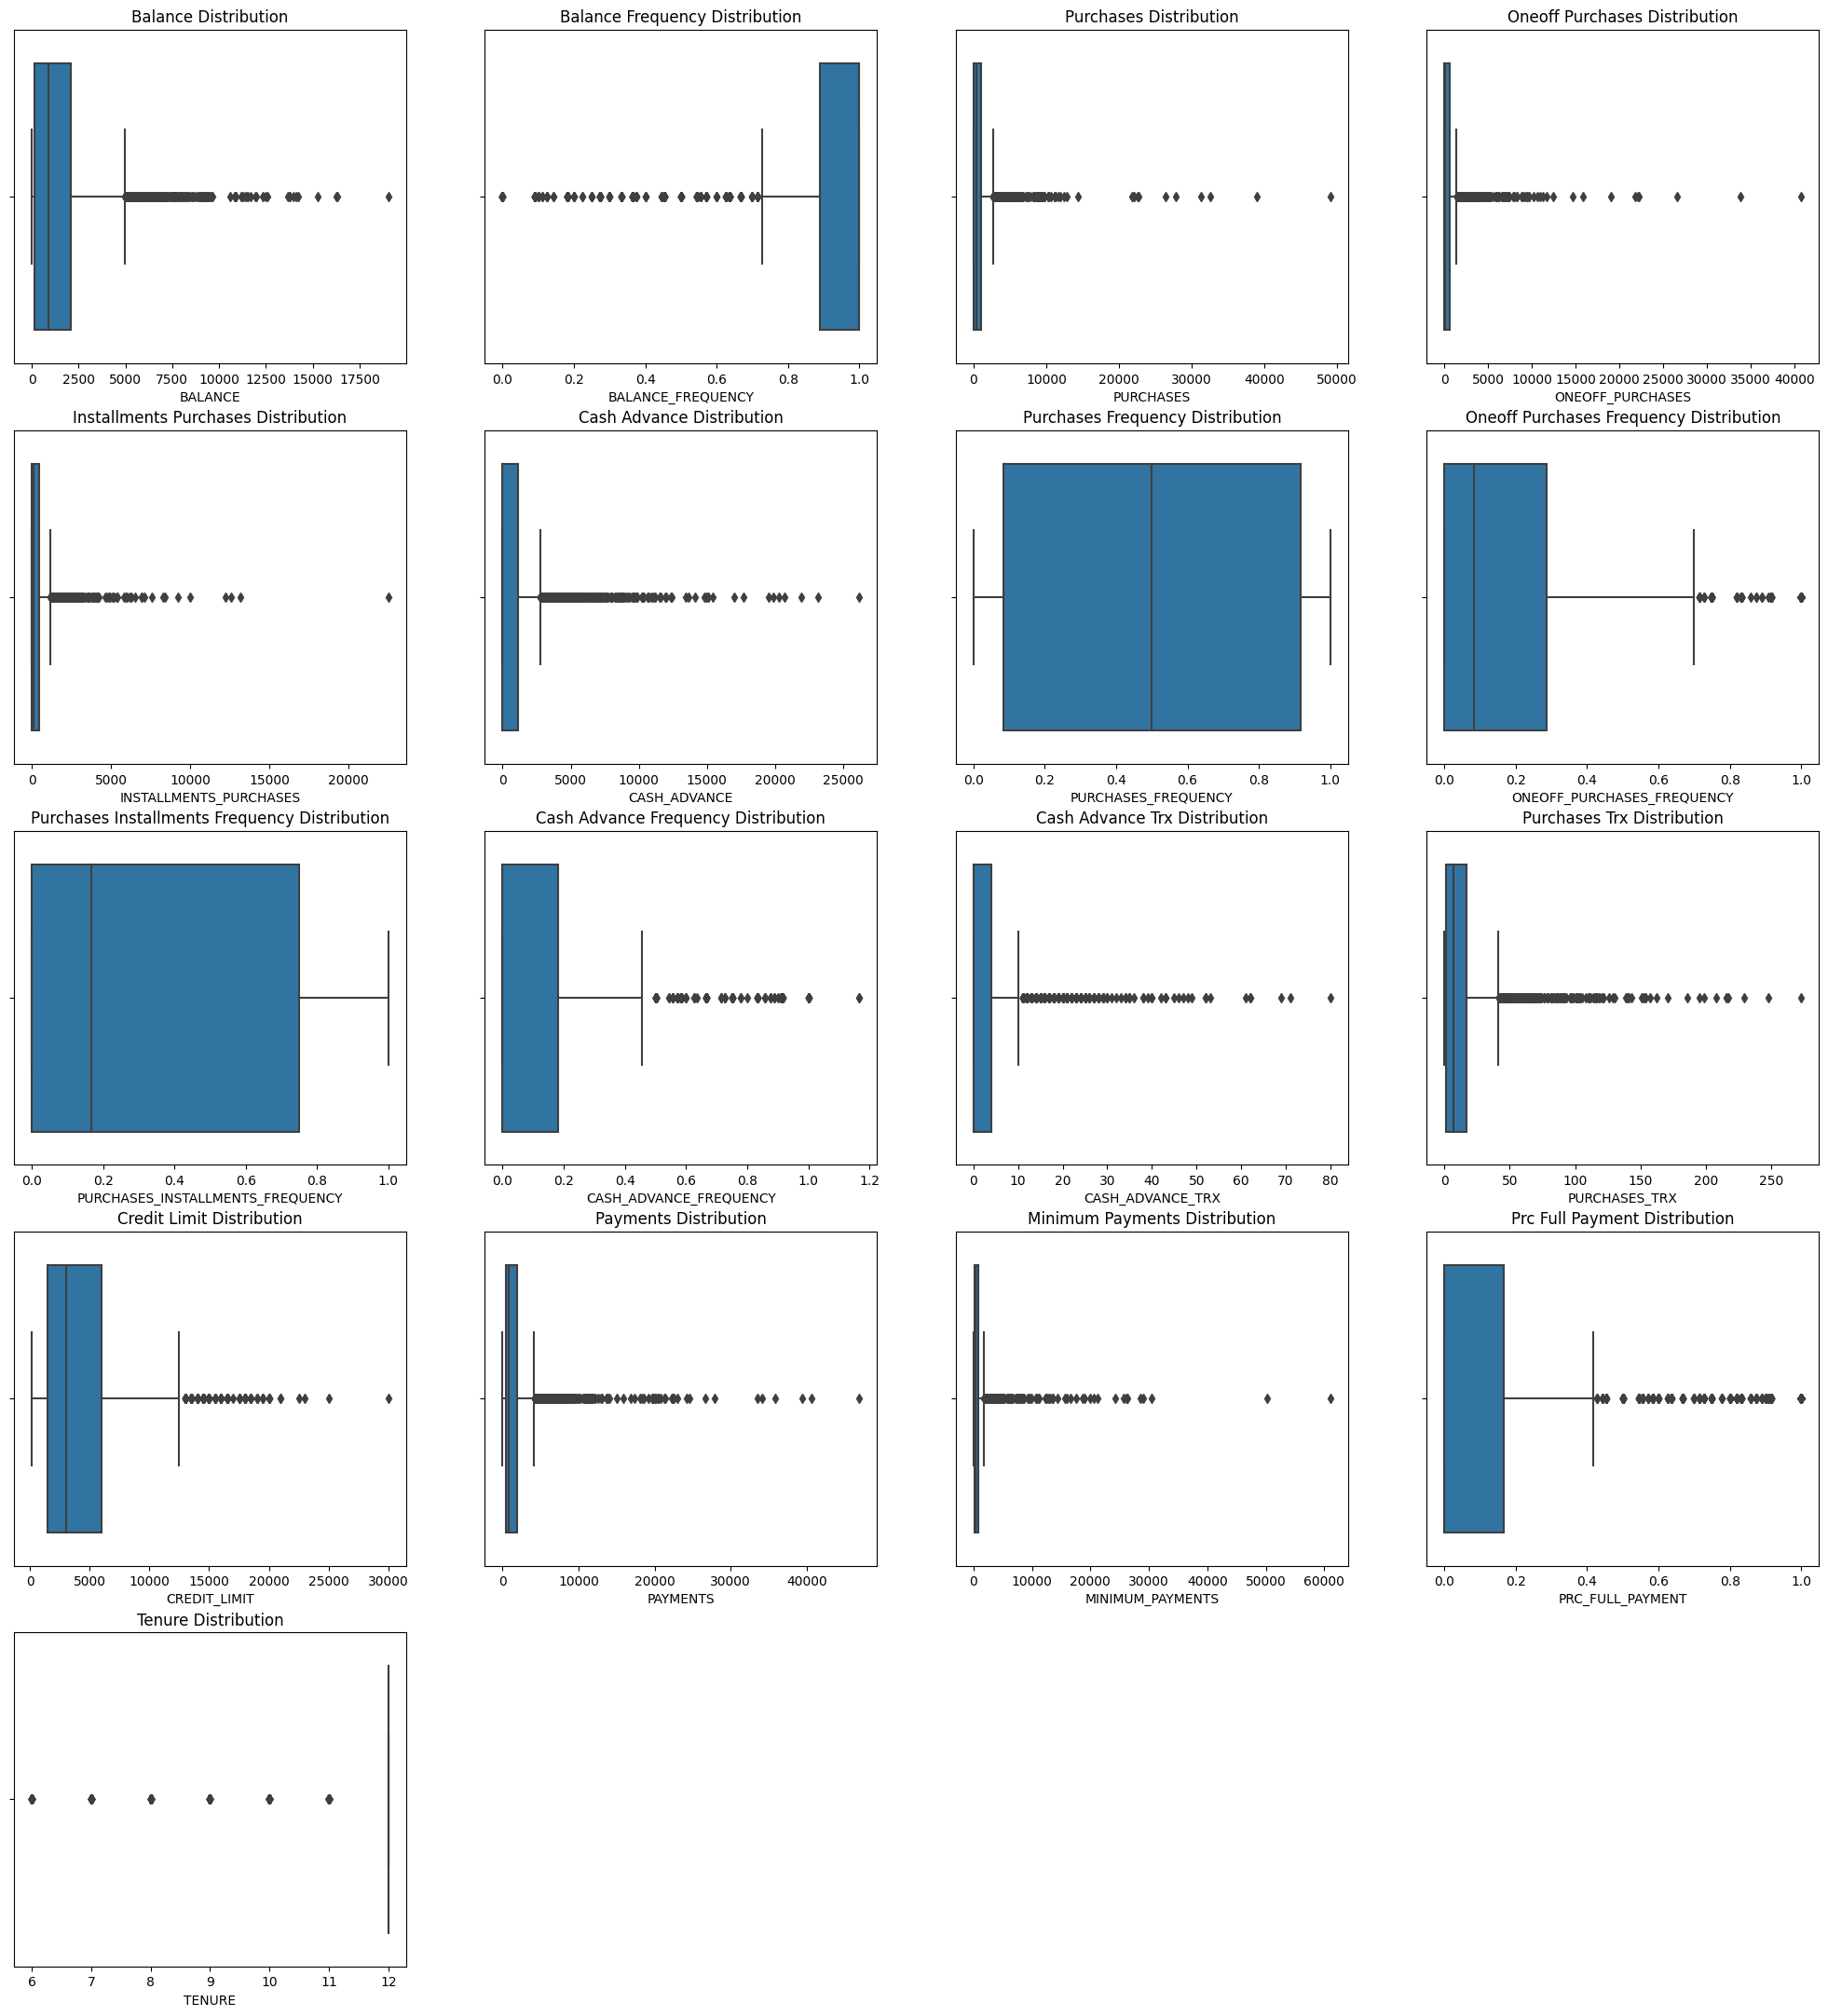

In [28]:
plt.figure(figsize=(25, 27))
for col in df_train.columns:
    plt.subplot(5, 4, data.columns.get_loc(col) + 1)
    sns.boxplot(x=col, data=df_train)
    plt.title(f"{col.replace('_', ' ').title()} Distribution")
plt.show()

Berdasarkan Boxplot hampir semua kolom memiliki outlier yang cukup banyak, outlier juga merupakan natural outlier sehingga outlier akan di biarkan saja dikarenakan apabila dihapus akan kehilangan banyak data / informasi sehingga untuk mengatasi ini akan dicoba beberapa model yang paling cocok dalam kasus ini.

### Handling Missing Value

Berdasarkan **EDA** Terdapat missing valeu di kolom `MINIMUM_PAYMENTS` dan `LIMIT_BALANCE` pada kolom ini data yang hilang akan diinput menggunakan nilai median. 

Input median pada df_train dan df_test

In [29]:
df_train.isna().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          0
PAYMENTS                              0
MINIMUM_PAYMENTS                    123
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [30]:
df_train.MINIMUM_PAYMENTS.fillna(data.MINIMUM_PAYMENTS.median(), inplace=True)

In [31]:
df_train.isna().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [32]:
df_test.isna().sum()

BALANCE                              0
BALANCE_FREQUENCY                    0
PURCHASES                            0
ONEOFF_PURCHASES                     0
INSTALLMENTS_PURCHASES               0
CASH_ADVANCE                         0
PURCHASES_FREQUENCY                  0
ONEOFF_PURCHASES_FREQUENCY           0
PURCHASES_INSTALLMENTS_FREQUENCY     0
CASH_ADVANCE_FREQUENCY               0
CASH_ADVANCE_TRX                     0
PURCHASES_TRX                        0
CREDIT_LIMIT                         1
PAYMENTS                             0
MINIMUM_PAYMENTS                    35
PRC_FULL_PAYMENT                     0
TENURE                               0
dtype: int64

In [33]:
df_test.MINIMUM_PAYMENTS.fillna(data.MINIMUM_PAYMENTS.median(), inplace=True)

In [34]:
df_test.CREDIT_LIMIT.fillna(data.CREDIT_LIMIT.median(), inplace=True)

In [35]:
df_test.isna().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

Dataset sudah tidak memiliki missing value

### Data Scaling

Pada bagian ini akan melakukan normalisasi (scaling) karena data akan digunakan untuk clustering algoritma **PCA**, **K-Means** yang berhubungan dengan jarak sehingga menggunaka **StandardScaler**

In [36]:
scaler = StandardScaler()
df_train_scaler = scaler.fit_transform(df_train)
df_test_scaler = scaler.transform(df_test)


In [37]:
# Convert to dataframe
df_train_scaler = pd.DataFrame(df_train_scaler, columns=data.columns)
df_test_scaler = pd.DataFrame(df_test_scaler, columns=data.columns)
df_train_scaler.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0 -0.576937           0.517318  -0.324151         -0.345543   
1  1.893750           0.517318  -0.241902         -0.071689   
2 -0.460019           0.517318  -0.451689         -0.345543   
3  0.059014          -0.262465  -0.451689         -0.345543   
4 -0.732516           0.517318  -0.137671          0.064373   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0               -0.141395     -0.347158             1.277735   
1               -0.444014      0.787267            -0.386125   
2               -0.444014      0.564839            -1.218054   
3               -0.444014      0.594752            -1.218054   
4               -0.444014     -0.466976             1.277735   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                   -0.673668                          1.236368   
1                    0.450286                         -0.916404   
2                   -0.673668                         -0.916404   
3                   -0.673668                         -0.916404   
4                    2.698197                         -0.916404   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.039416         -0.344168      -0.314385     -0.946702   
1                0.573518          0.426582      -0.357754      1.358079   
2                0.158108         -0.190018      -0.617965     -0.756896   
3               -0.257307         -0.190018      -0.617965      0.002326   
4               -0.672717         -0.498318      -0.097543      1.493654   

   PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT    TENURE  
0 -0.558198         -0.307971         -0.529484 -3.304667  
1 -0.159915          0.540738         -0.529484  0.364225  
2  0.329233         -0.267254          0.325235  0.364225  
3  1.266632         -0.066568         -0.149609  0.364225  
4 -0.339294         -0.284648          2.889391  0.364225

### Principal Component Analysis (PCA)

Pada **PCA** akan dilakukan reduksi dimensi

In [38]:
pca = PCA(n_components=17)
pca.fit(df_train_scaler)

PCA(n_components=17)

Menghitung cumulative explained variance ratio dari component.

In [39]:
cumsum = np.cumsum(pca.explained_variance_ratio_)

Membuat plot untuk melihat explained variance ratio.

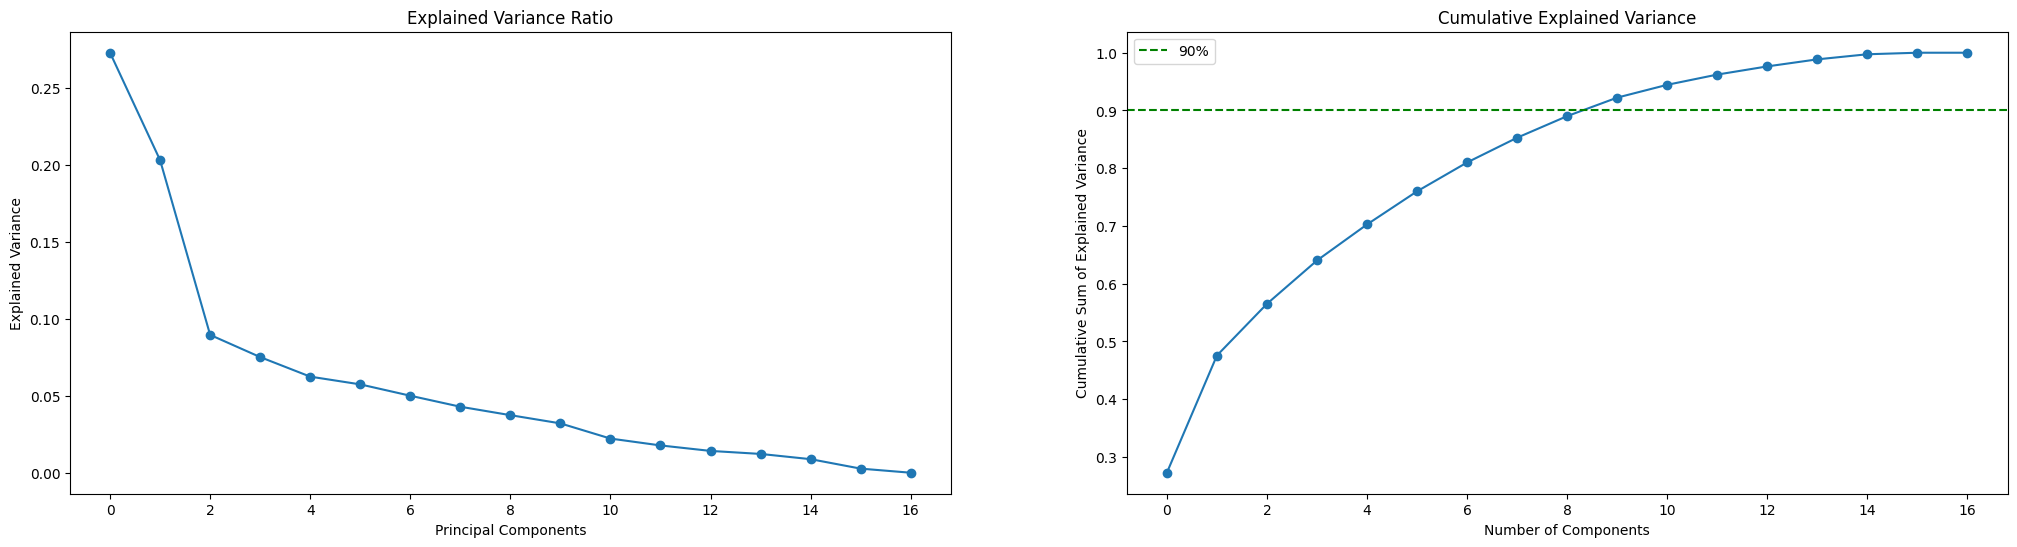

In [40]:
plt.figure(figsize=(25, 6))
plt.subplot(1, 2, 1)
plt.plot(pca.explained_variance_ratio_, marker='o')
plt.title('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance')
plt.subplot(1, 2, 2)
cev = plt.plot(cumsum, marker='o')
plt.axhline(y=0.90, color='green', linestyle='--', label='90%')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Sum of Explained Variance')
plt.legend()
plt.show()

Jika dilihat pada grafik diatas berdasarkan nilai cumulative explained variance sudah tidak mengalami kenaikan yang siginifikan ketika bernilai 0.90 atau dengan kata lain pada nilai components 9 sudah dapat mempertahankan data sebanyak 90%. Supaya lebih meyakinkan akan dicari best component.

In [41]:
threshold_cumsum = 0.90
best_principal_comp = 0 
for pc_ke,cumsum in enumerate(np.cumsum(pca.explained_variance_ratio_)):
    if cumsum >= threshold_cumsum:
        best_principal_comp = pc_ke
        break
best_principal_comp

9

Telah diperoleh best principal component yaitu **9**

In [42]:
pca_9 = PCA(n_components=9)

In [43]:
train = pca_9.fit_transform(df_train_scaler)
test = pca_9.fit_transform(df_test_scaler)

Merubah menjadi DataFrame

In [44]:
train = pd.DataFrame(train, columns=['PCA_' + str(i) for i in range(1, 10)])
test = pd.DataFrame(test, columns=['PCA_' + str(i) for i in range(1, 10)])

Dibawah ini hasil dari reduksi dimensi

In [45]:
train.head()

PCA_1     PCA_2     PCA_3     PCA_4     PCA_5     PCA_6     PCA_7  \
0 -0.507243 -1.246516 -1.131649 -2.011292 -0.803818  2.592741 -0.583759   
1 -0.345990  2.292629 -0.433380  1.148079 -0.294501 -0.612374 -1.141683   
2 -1.579550  0.229222  0.616685  0.124369  0.085822 -0.510639  0.822474   
3 -1.237187  0.740183  1.089170  0.618428  0.760658 -0.484397  0.256424   
4  1.511389 -1.278585  0.707750 -0.569073 -1.019665 -2.284791 -2.414507   

      PCA_8     PCA_9  
0 -0.715426 -0.890130  
1 -0.172264 -0.225478  
2  0.553030 -0.851362  
3 -0.020976 -0.498216  
4  1.780151 -0.608690

# 6 - Model Definition

Pada bagian ini akan menggunakan 3 model, yaitu:
- k_means adalah model untuk **K-Means Clustering**
- Density-Based Spatial Clustering of Applications with Noise (DBSCAN)
- Agglomerative Clustering

In [46]:
k_means = KMeans()
db = DBSCAN()
agg = AgglomerativeClustering()

# 7 - Model Training

In [47]:
%timeit k_means.fit(train)
%timeit db.fit(train)
%timeit agg.fit(train)

73.3 ms ± 6.16 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
114 ms ± 32 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
867 ms ± 231 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


# 8 - Model Evaluation

### K-Means Clustering

In [48]:
K = [2,3,4,5,6,7,8,9,10]
inertia = [KMeans(n_clusters=k, random_state=22).fit(train).inertia_ for k in K]

Membuat plot dengan metode elbow

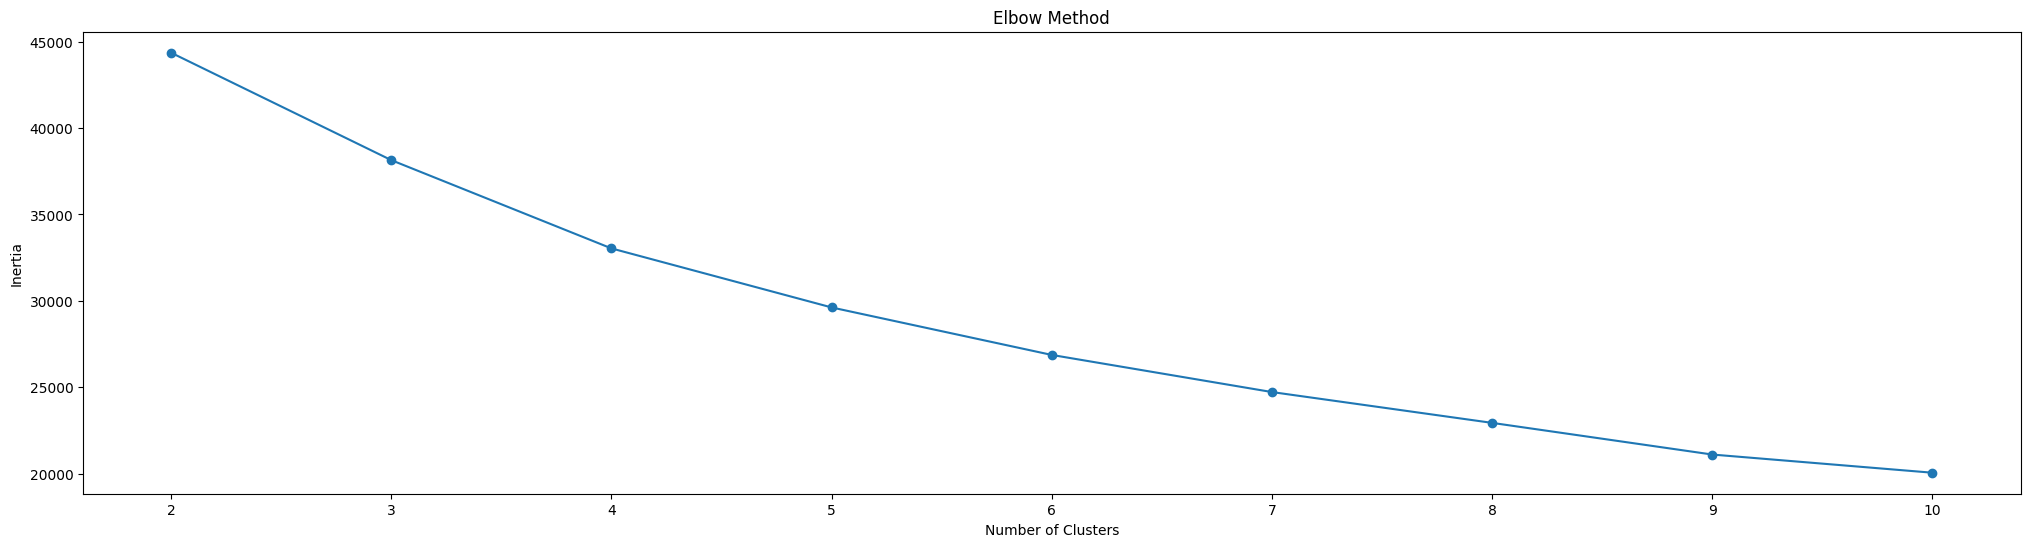

In [49]:
plt.figure(figsize=(25, 6))
plt.plot(K, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

Berdasarkan metode elbow jumlah cluster antara 3 dan 4. untuk evaluasi akan dilihat dengan **Silhouette Score**

#### Silhoutte Score

In [50]:
kmeans_score = pd.DataFrame(columns=['K', 'Silhouette Score'])

In [51]:
for i in range(2, 11):
    kmeans_score.loc[i-2] = [i, round(silhouette_score(train, KMeans(n_clusters=i, random_state=23).fit(train).labels_), 3)]

Membuat plot dengan metode elbow

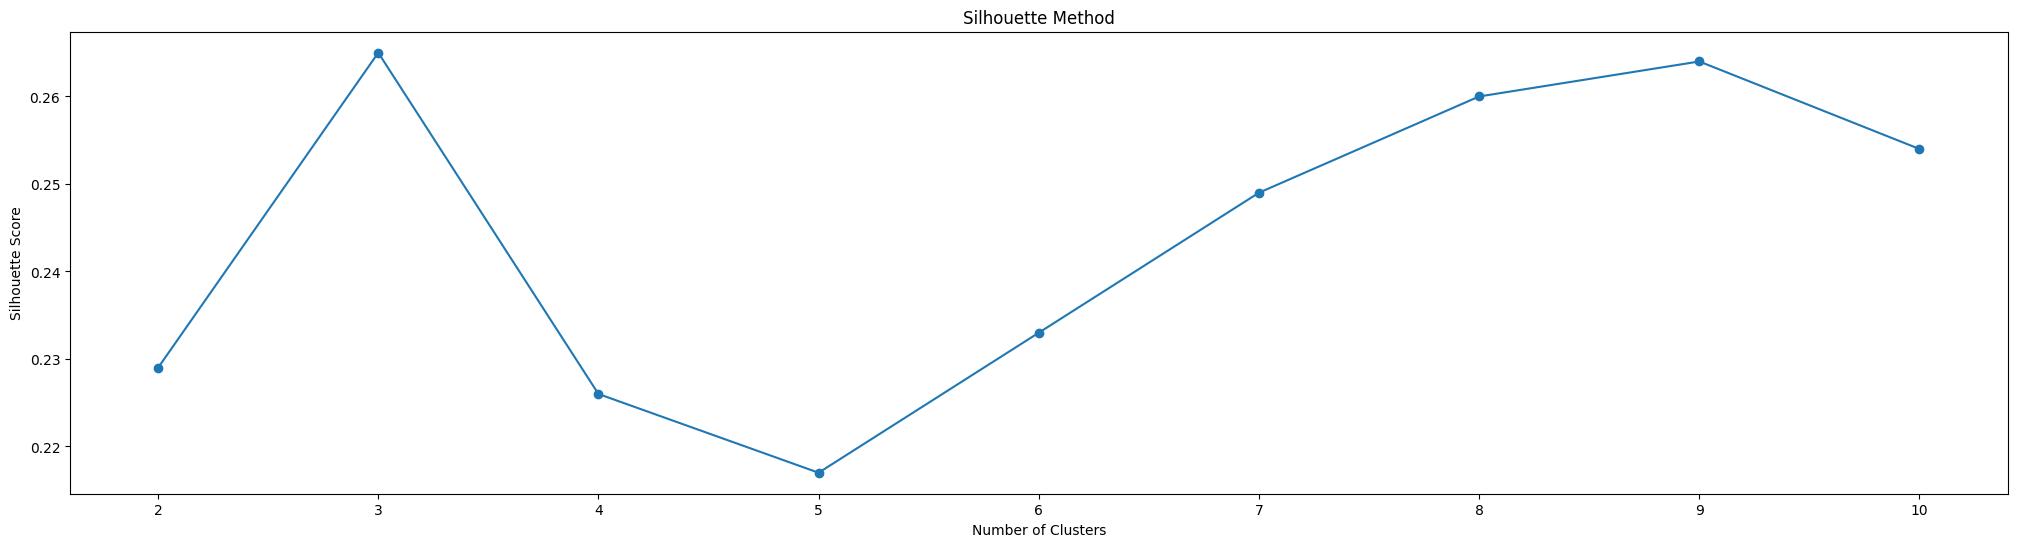

In [52]:
plt.figure(figsize=(25, 6))
plt.plot(kmeans_score['K'], kmeans_score['Silhouette Score'], marker='o')
plt.title('Silhouette Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [53]:
kmeans_score.sort_values(by='Silhouette Score', ascending=False)

K  Silhouette Score
1   3.0             0.265
7   9.0             0.264
6   8.0             0.260
8  10.0             0.254
5   7.0             0.249
4   6.0             0.233
0   2.0             0.229
2   4.0             0.226
3   5.0             0.217

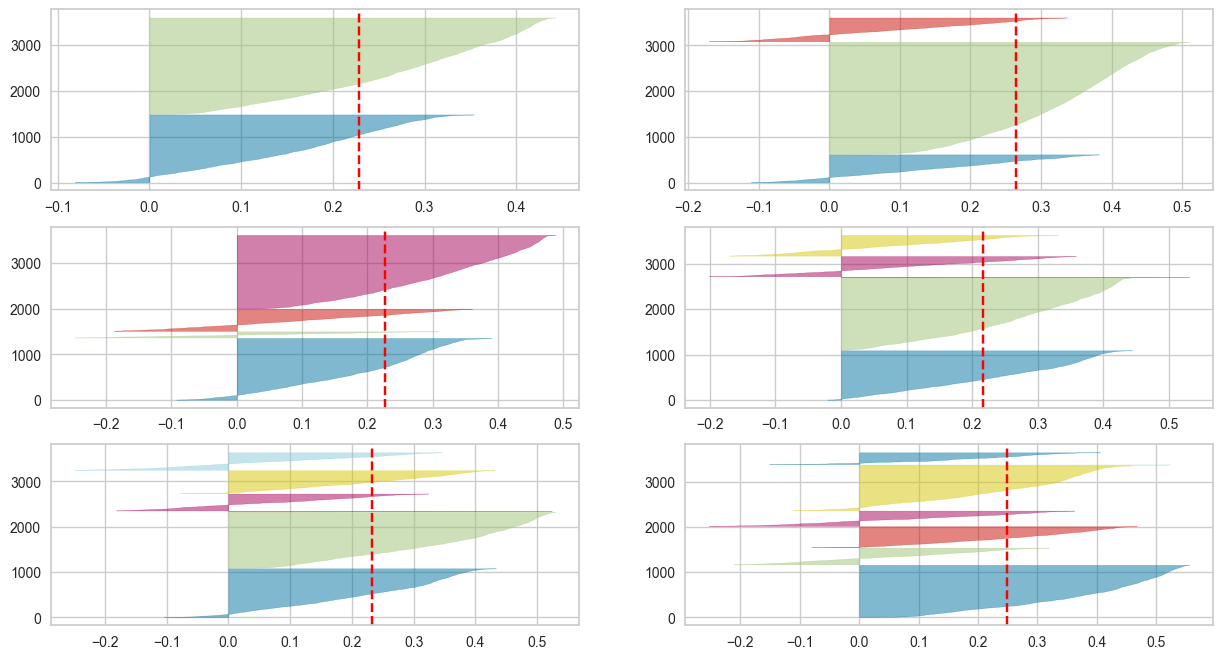

In [63]:
fig, ax = plt.subplots(3, 2, figsize = (15,8))
for i in np.arange(2,8):
  km = KMeans(n_clusters = i, init="k-means++", n_init = 10, max_iter = 100, random_state = 22)
  q, mod = divmod(i,2)

  visualizer = SilhouetteVisualizer(km, colors = 'yellowbrick', ax = ax[q-1][mod])
  visualizer.fit(train)

- Berdasarkan hasil Silhoutte score diperoleh nilai tertinggi yaitu 0.265 dengan jumlah **cluster** adalah **3**.
- Berdasarkan SilhouetteVisualizer 0.265 bentuknya tidak sama dimana salah satu plotnya memiliki nilai yang besar.

In [58]:
kmeans = KMeans(n_clusters=3, random_state=22)
kmeans.fit(train)

KMeans(n_clusters=3, random_state=22)

Membuat plot cluster 

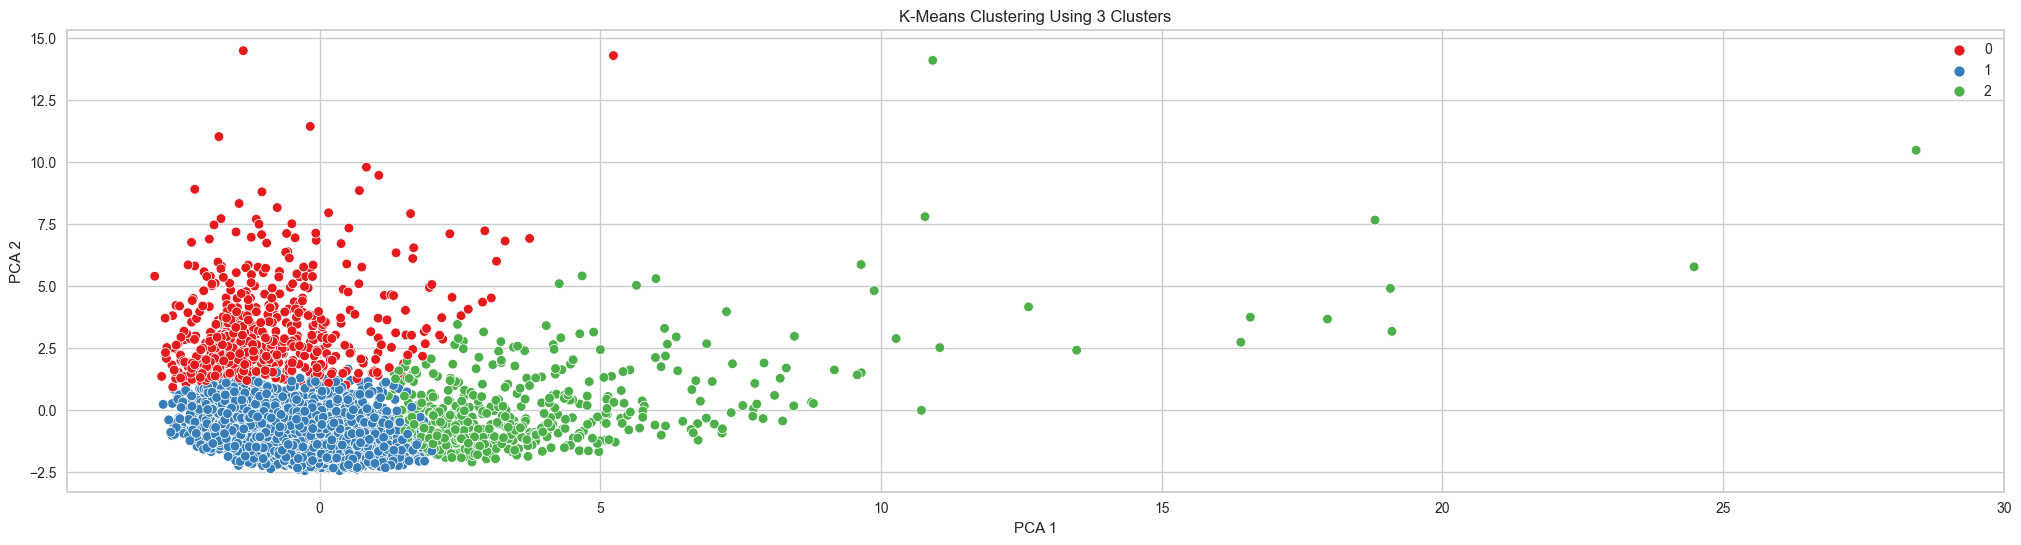

In [59]:
plt.figure(figsize=(25, 6))
sns.scatterplot(x='PCA_1', y='PCA_2', hue=kmeans.labels_, data=train, palette='Set1')
plt.title('K-Means Clustering Using 3 Clusters')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

### DBSCAN

In [60]:
dbscan_score = pd.DataFrame(columns=['eps', 'Silhouette Score'])
epsilons = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
for i in range(len(epsilons)):
    dbscan_score.loc[i] = [epsilons[i], round(silhouette_score(train, DBSCAN(eps=epsilons[i]).fit(train).labels_), 3)]

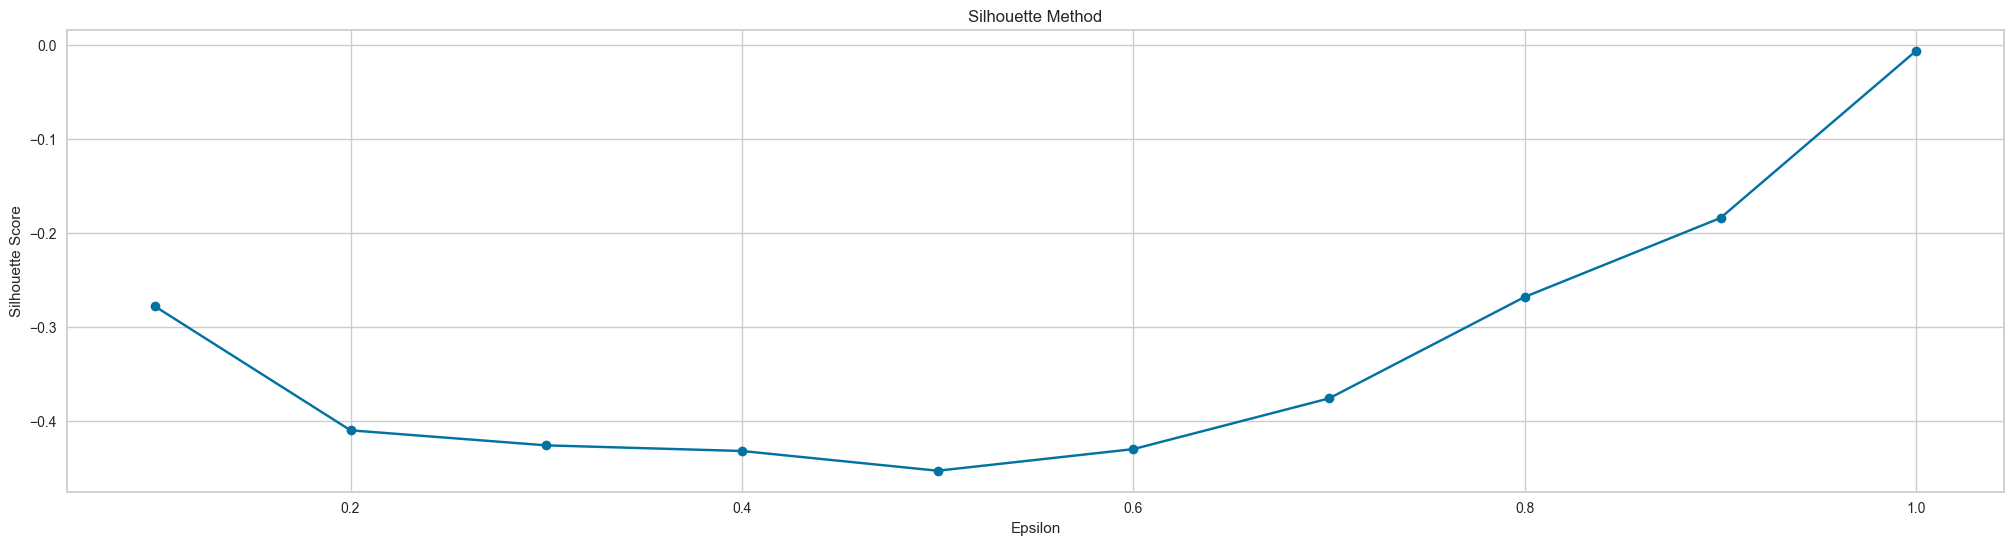

In [64]:
plt.figure(figsize=(25, 6))
plt.plot(dbscan_score['eps'], dbscan_score['Silhouette Score'], marker='o')
plt.title('Silhouette Method')
plt.xlabel('Epsilon')
plt.ylabel('Silhouette Score')
plt.show()

In [65]:
dbscan_score.sort_values(by='Silhouette Score', ascending=False)

eps  Silhouette Score
9  1.0            -0.006
8  0.9            -0.184
7  0.8            -0.268
0  0.1            -0.278
6  0.7            -0.376
1  0.2            -0.410
2  0.3            -0.426
5  0.6            -0.430
3  0.4            -0.432
4  0.5            -0.453

berdasarkan Silhouette Score nilai terbesar adalah -0.006 yaitu epsilon 1.0

In [66]:
dbscan = DBSCAN(eps=1.0)
dbscan.fit(train)

DBSCAN(eps=1.0)

Membuat plot cluster

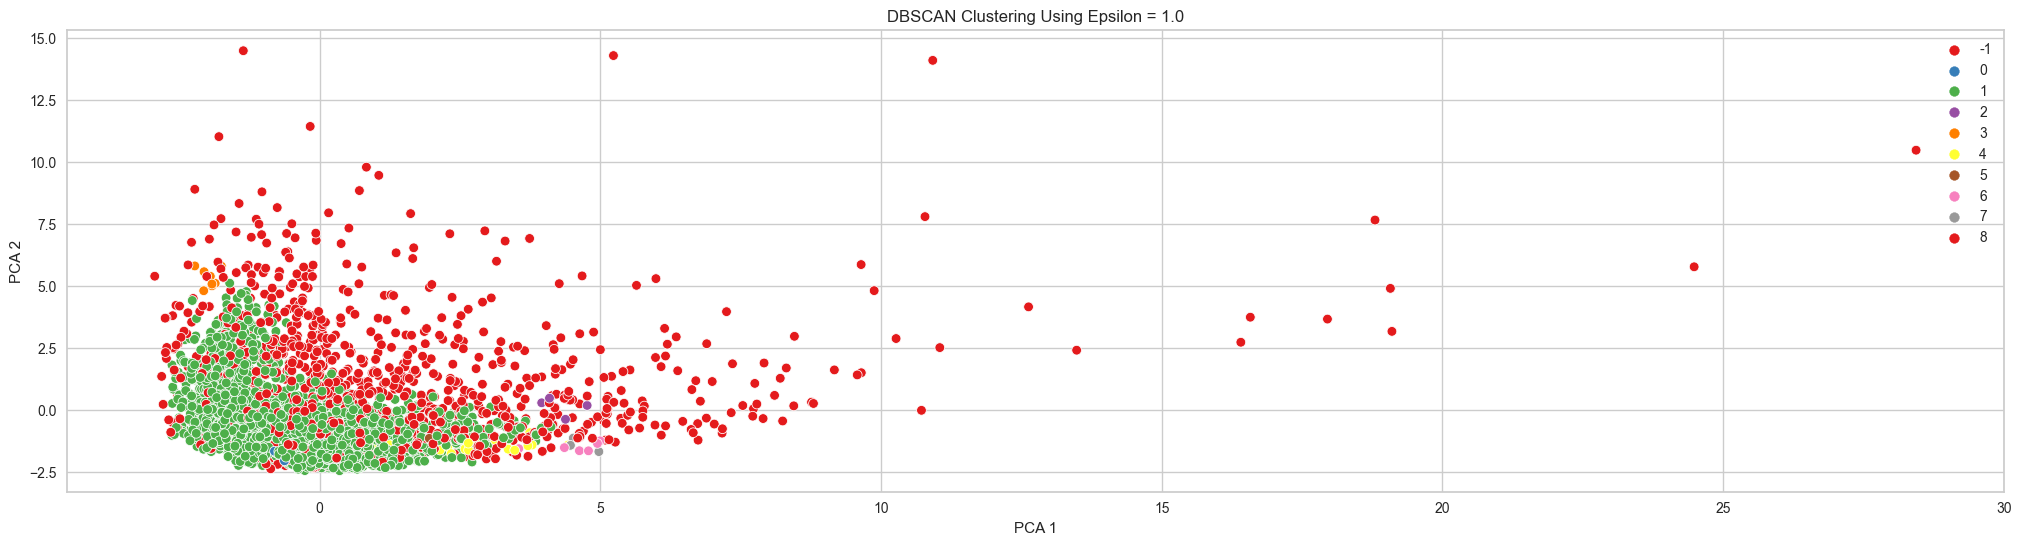

In [67]:
plt.figure(figsize=(25, 6))
sns.scatterplot(x='PCA_1', y='PCA_2', hue=dbscan.labels_, data=train, palette='Set1')
plt.title('DBSCAN Clustering Using Epsilon = 1.0')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

### Agglomerative Clustering

Membuat Dataframe

In [68]:
agglomerative_score = pd.DataFrame(columns=['n_clusters', 'Silhouette Score'])
for i in range(2, 11):
    agglomerative_score.loc[i-2] = [i, round(silhouette_score(train, AgglomerativeClustering(n_clusters=i, linkage='ward').fit(train).labels_), 3)]

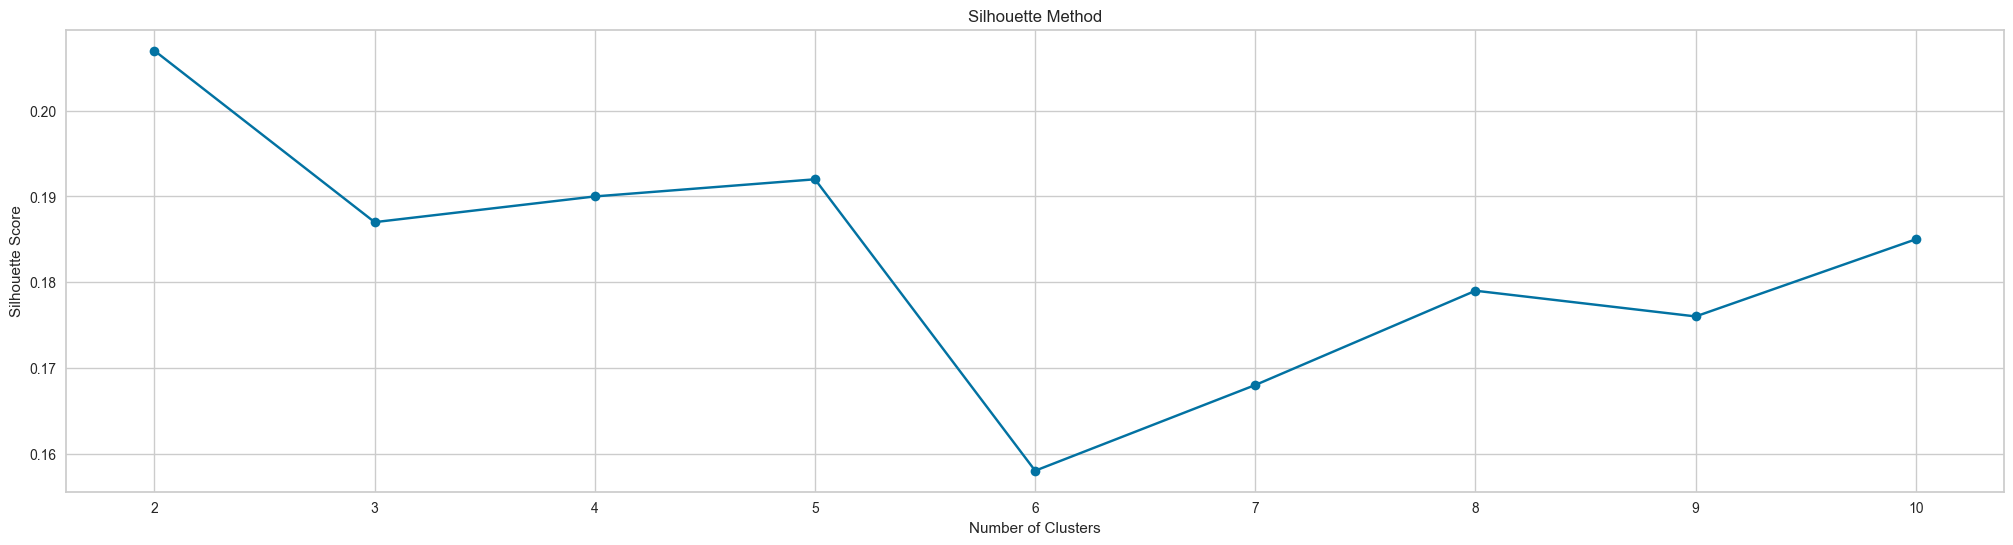

In [69]:
plt.figure(figsize=(25, 6))
plt.plot(agglomerative_score['n_clusters'], agglomerative_score['Silhouette Score'], marker='o')
plt.title('Silhouette Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [70]:
agglomerative_score.sort_values(by='Silhouette Score', ascending=False)

n_clusters  Silhouette Score
0         2.0             0.207
3         5.0             0.192
2         4.0             0.190
1         3.0             0.187
8        10.0             0.185
6         8.0             0.179
7         9.0             0.176
5         7.0             0.168
4         6.0             0.158

Berdasarkan Silhouette Score tertinggi adalah 207 dengan n cluster adalah 2

In [71]:
agglomerative = AgglomerativeClustering(n_clusters=2, linkage='ward')
agglomerative.fit(train)

AgglomerativeClustering()

Membuat plot cluster

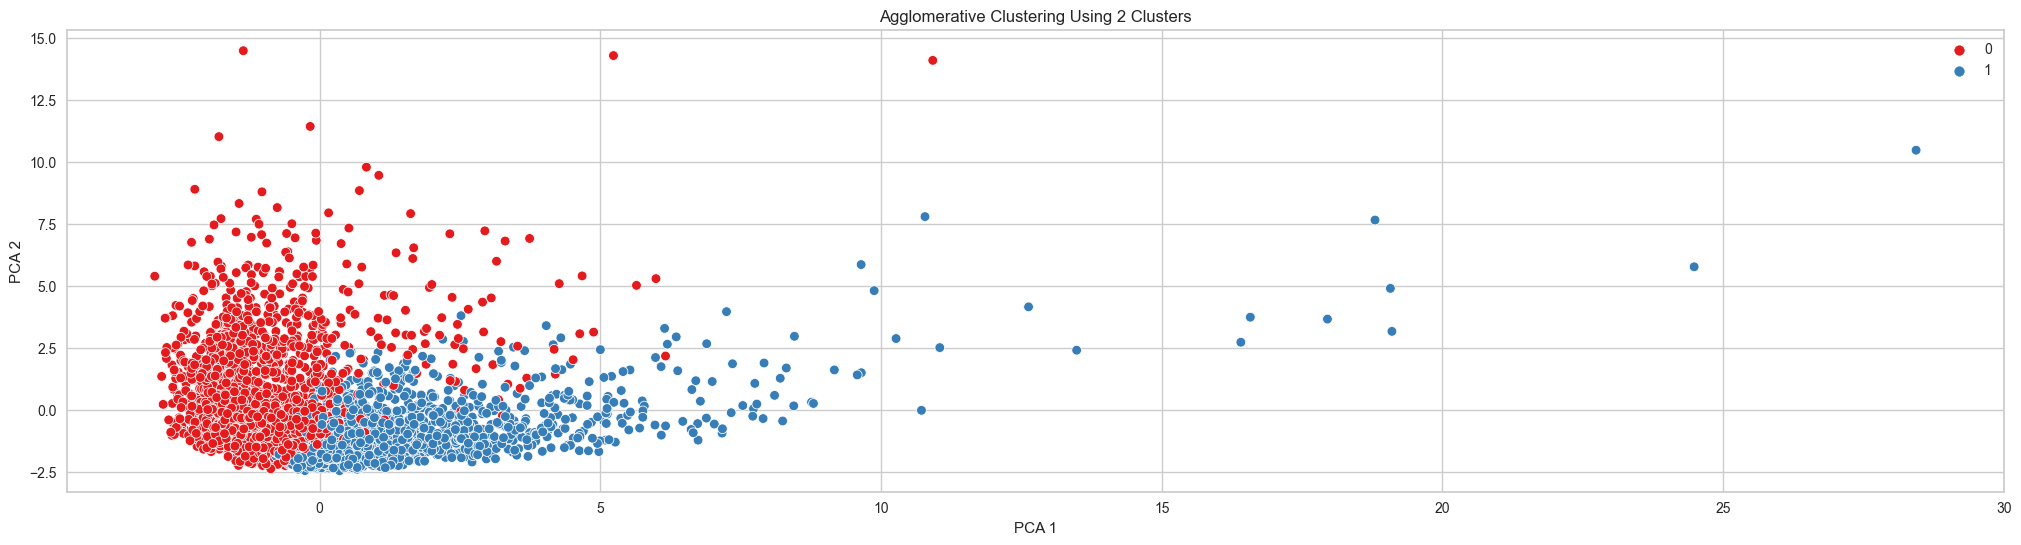

In [72]:
plt.figure(figsize=(25, 6))
sns.scatterplot(x='PCA_1', y='PCA_2', hue=agglomerative.labels_, data=train, palette='Set1')
plt.title('Agglomerative Clustering Using 2 Clusters')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

### Model Analysis

Berikut kesimpulan dari 3 model clustering yang dibuat: 
- **K-Means** : diperoleh silhoutte score paling tinggi 0.266 dengan jumlah cluster 3. 
- **DBSCAN** : diperoleh silhoutte score paling tinggi - 0.006 dengan epsilon 1.0. model ini kurang optimal karena silhoutte score terlalu rendah dan banyaknya data yang saling menumpuk
- **Agglomerative** : diperoleh silhoutte score paling tinggi 0.207 dengan jumlah cluster 2. model ini kurang optimal karna adanya penumpukan dititik 0.
- Dari 3 model tersebut akan menngunakan **K-Means**, karena K-Means dapat mengelompokan data lebih optimal dan lebih cocok dengan data ini.


In [ ]:
test.head()

### Predictions

Pada bagian ini akan melakukan prediksi pada data test

In [73]:
pred = kmeans.predict(test)

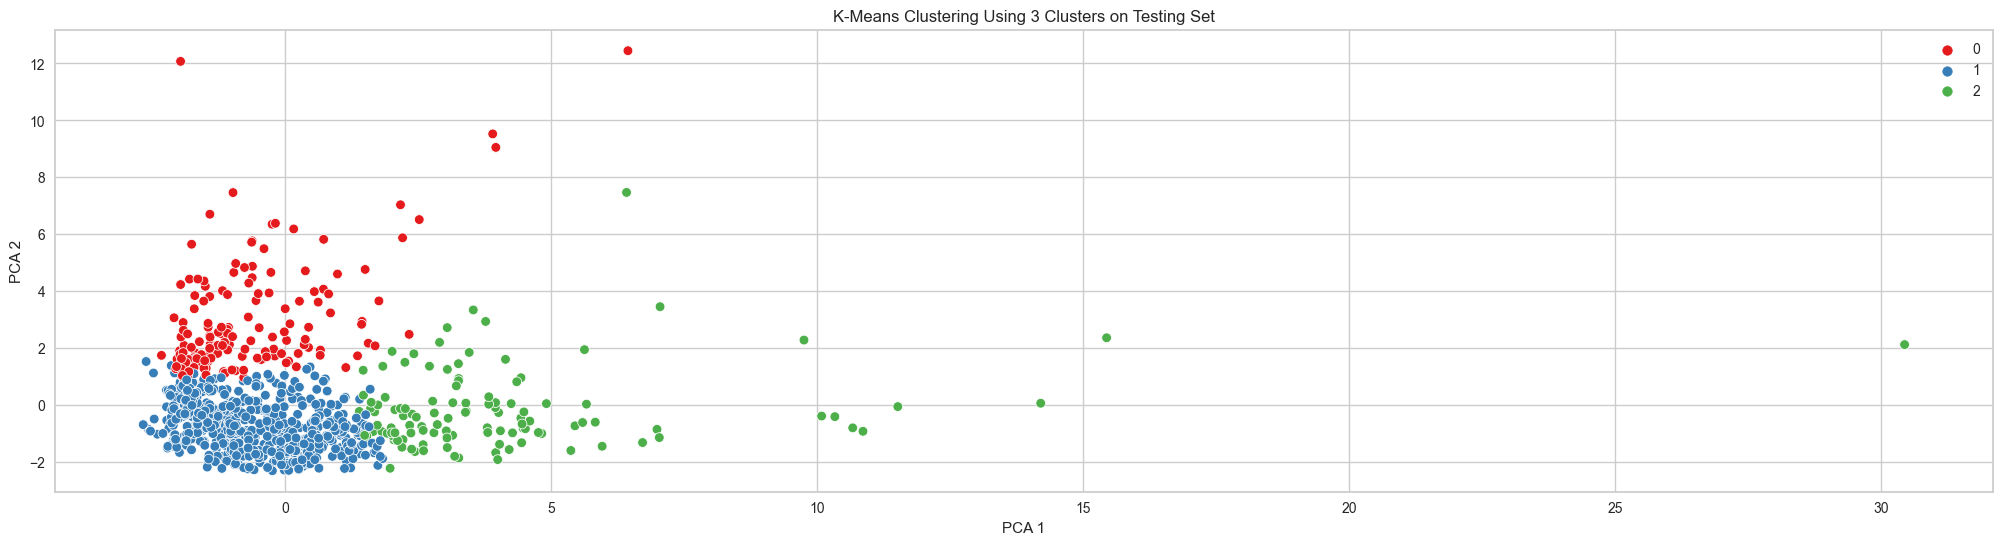

In [74]:
plt.figure(figsize=(25, 6))
sns.scatterplot(x='PCA_1', y='PCA_2', hue=pred, data=test, palette='Set1')
plt.title('K-Means Clustering Using 3 Clusters on Testing Set')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

Pada cluster ini, cluster 1 memiliki data yang paling banyak diantara yang lain

### Analisis Cluster

Menggabungkan data train dan test untuk prediksi 

In [75]:
df = pd.concat([train, test])
df_pred = kmeans.predict(df)

In [76]:
data2 =pd.concat([df_train, df_test])

In [77]:
cluster_data = data2.copy()
cluster_data['CLUSTER'] = df_pred
cluster_data.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
2884   367.263145           1.000000     280.00              0.00   
2570  5538.646971           1.000000     460.57            460.57   
3752   611.983643           1.000000       0.00              0.00   
3135  1698.369764           0.818182       0.00              0.00   
422     41.620283           1.000000     689.40            689.40   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
2884                   280.0    254.298735             1.000000   
2570                     0.0   2661.970456             0.333333   
3752                     0.0   2189.894057             0.000000   
3135                     0.0   2253.381516             0.000000   
422                      0.0      0.000000             1.000000   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
2884                    0.000000                          0.857143   
2570                    0.333333                          0.000000   
3752                    0.000000                          0.000000   
3135                    0.000000                          0.000000   
422                     1.000000                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
2884                0.142857                 1              7        1000.0   
2570                0.250000                 6              6        9500.0   
3752                0.166667                 2              0        1700.0   
3135                0.083333                 2              0        4500.0   
422                 0.000000                 0             12       10000.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  CLUSTER  
2884    64.596029        137.819399          0.000000       7        1  
2570  1253.713151       2103.456999          0.000000      12        0  
3752  2714.119535        232.121830          0.250000      12        1  
3135  5512.828223        696.916536          0.111111      12        1  
422    718.158580        191.837369          1.000000      12        2

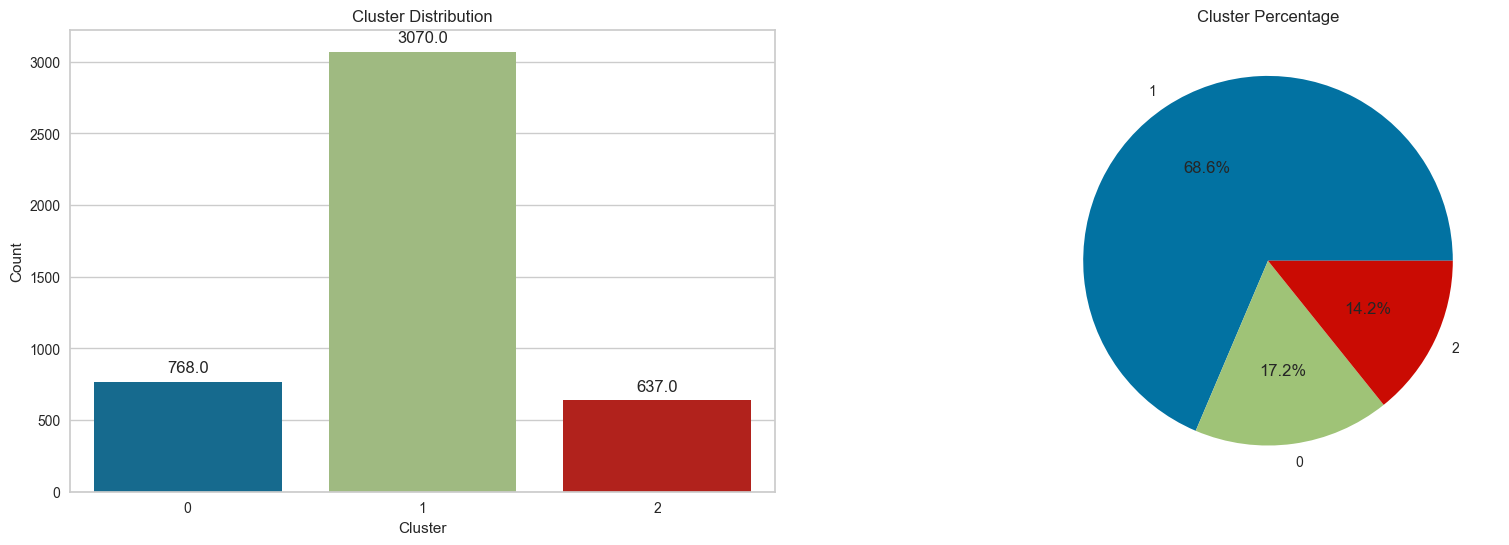

In [78]:
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
fig = sns.countplot(x='CLUSTER', data=cluster_data)
for p in fig.patches:
    fig.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.title('Cluster Distribution')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.subplot(1, 2, 2)
plt.pie(cluster_data['CLUSTER'].value_counts(), labels=cluster_data['CLUSTER'].value_counts().index, autopct='%1.1f%%')
plt.title('Cluster Percentage')
plt.show()

Persentase cluster 0 paling banyak

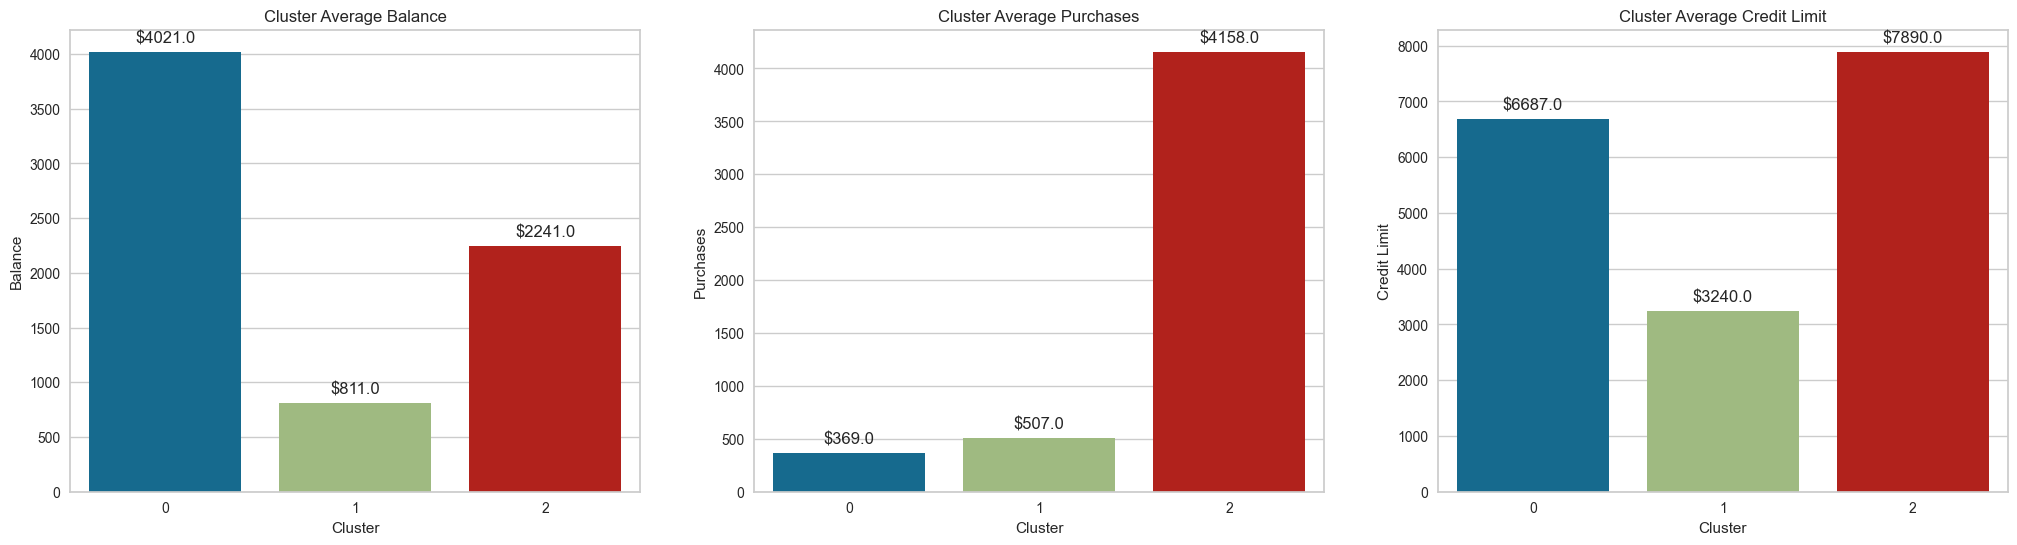

In [79]:
plt.figure(figsize=(25, 6))
plt.subplot(1, 3, 1)
fig = sns.barplot(x='CLUSTER', y='BALANCE', data=cluster_data, ci=None)
for p in fig.patches:
    fig.annotate('$'+ str(round(p.get_height(), 0)), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.title('Cluster Average Balance')
plt.xlabel('Cluster')
plt.ylabel('Balance')
plt.subplot(1, 3, 2)
fig = sns.barplot(x='CLUSTER', y='PURCHASES', data=cluster_data, ci=None)
for p in fig.patches:
    fig.annotate('$'+ str(round(p.get_height(), 0)), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.title('Cluster Average Purchases')
plt.xlabel('Cluster')
plt.ylabel('Purchases')
plt.subplot(1, 3, 3)
fig = sns.barplot(x='CLUSTER', y='CREDIT_LIMIT', data=cluster_data, ci=None)
for p in fig.patches:
    fig.annotate('$'+ str(round(p.get_height(), 0)), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.title('Cluster Average Credit Limit')
plt.xlabel('Cluster')
plt.ylabel('Credit Limit')
plt.show()

Cluster 0 memiliki balance paling banyak, cluster 2 paling banyak melakukan pembelian, cluster 2 paling banyak memiliki credit limit

In [80]:
#separating the dataframe by cluster
CLUSTER_0 = cluster_data[cluster_data['CLUSTER'] == 0]
CLUSTER_1 = cluster_data[cluster_data['CLUSTER'] == 1]
CLUSTER_2 = cluster_data[cluster_data['CLUSTER'] == 2]

Text(0.5, 1.0, 'PURCHASES Persentage')

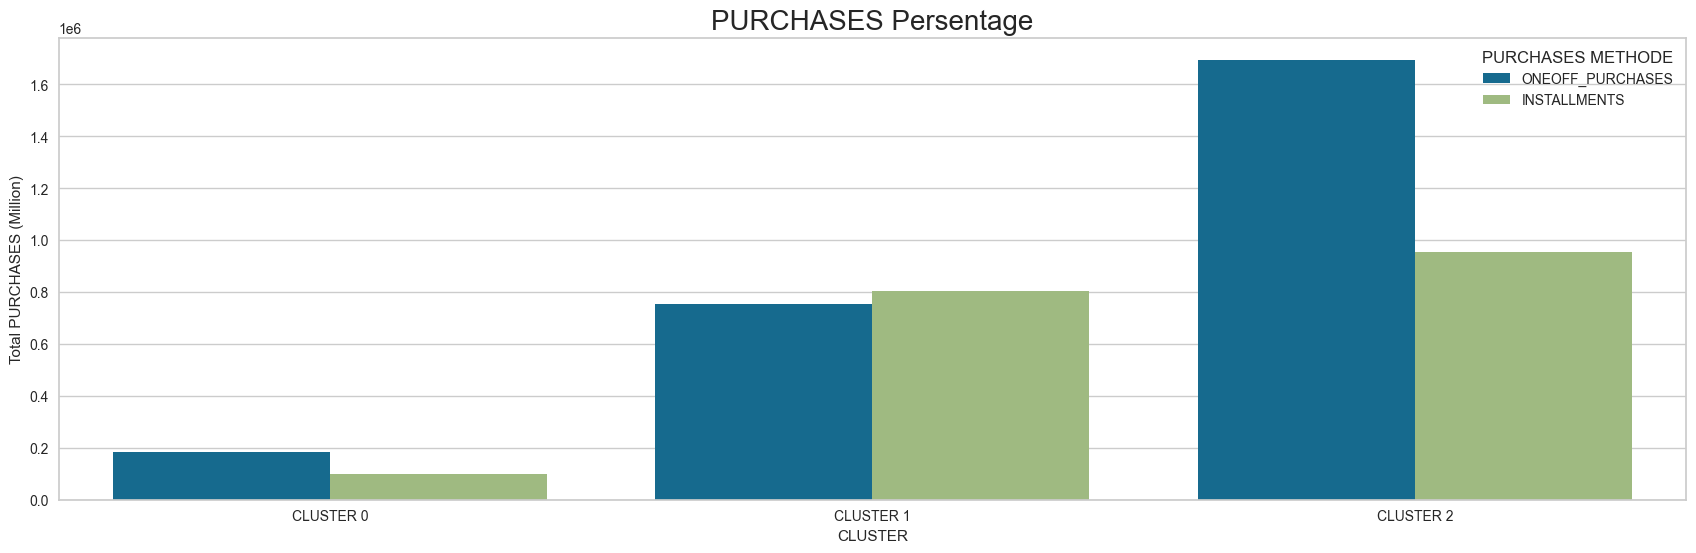

In [81]:
#Check Detail PURCHASES
plt.figure(figsize=(21,6))
ax = pd.DataFrame({'CLUSTER' : ['CLUSTER 0', 'CLUSTER 0', 'CLUSTER 1', 'CLUSTER 1','CLUSTER 2', 'CLUSTER 2'],
                    'PURCHASES' : [CLUSTER_0['ONEOFF_PURCHASES'].sum(), 
                                   CLUSTER_0['INSTALLMENTS_PURCHASES'].sum(),
                                   CLUSTER_1['ONEOFF_PURCHASES'].sum(), 
                                   CLUSTER_1['INSTALLMENTS_PURCHASES'].sum(),
                                   CLUSTER_2['ONEOFF_PURCHASES'].sum(), 
                                   CLUSTER_2['INSTALLMENTS_PURCHASES'].sum(),], 
                    'PURCHASES METHODE' : ['ONEOFF_PURCHASES', 'INSTALLMENTS', 'ONEOFF_PURCHASES', 'INSTALLMENTS', 'ONEOFF_PURCHASES', 'INSTALLMENTS']})
sns.barplot(x='CLUSTER', y='PURCHASES', data=ax, hue = 'PURCHASES METHODE' )
plt.ylabel('Total PURCHASES (Million)')
plt.xlabel('CLUSTER')
plt.title('PURCHASES Persentage', size = 20)

Cluster 0 paling banyak melakukan pembelian dengan sekali bayar, cluster 2 paling banyak melakukan pembelian secara cicilan, cluster 2 paling banyak melakukan pembayaran sekali bayar

Text(0.5, 1.0, 'CLUSTER 2')

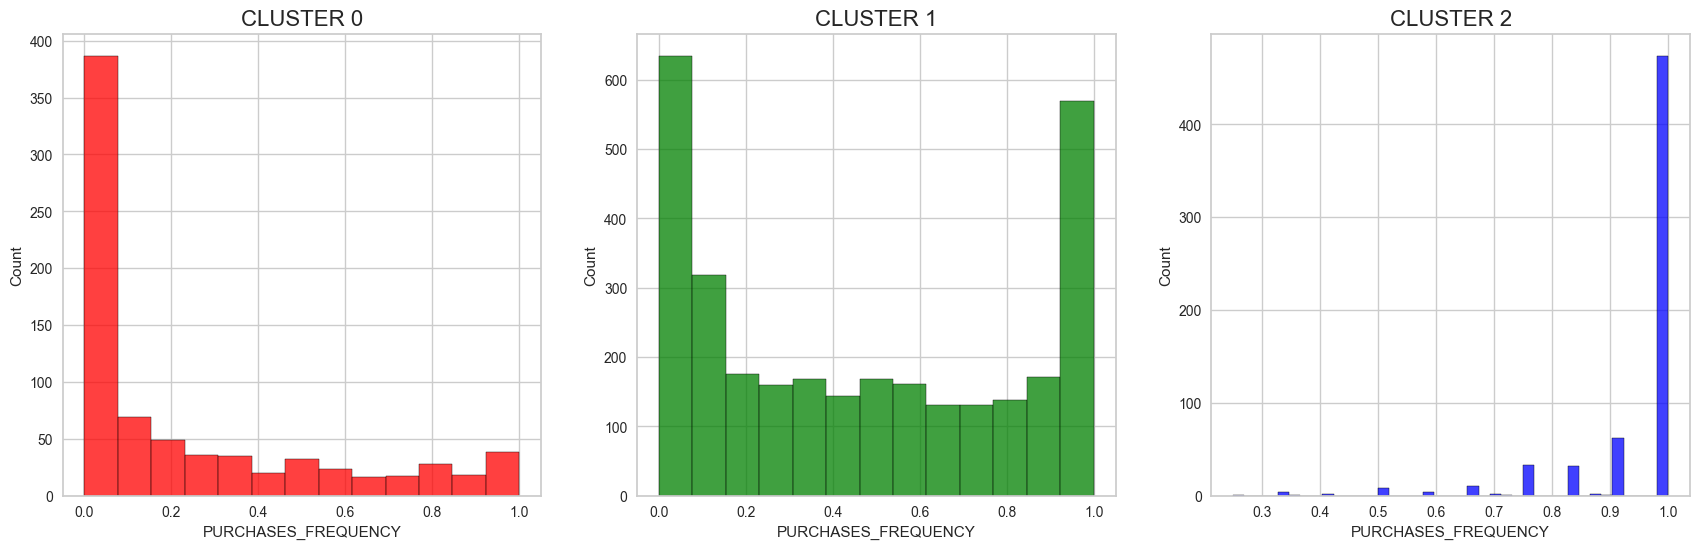

In [82]:
plt.figure(figsize=(21,6))
plt.subplot(1,3,1)
sns.histplot(CLUSTER_0['PURCHASES_FREQUENCY'], color = 'red')
plt.title('CLUSTER 0', size = 16)
plt.subplot(1,3,2)
sns.histplot(CLUSTER_1['PURCHASES_FREQUENCY'], color='green')
plt.title('CLUSTER 1', size = 16)
plt.subplot(1,3,3)
sns.histplot(CLUSTER_2['PURCHASES_FREQUENCY'], color='blue')
plt.title('CLUSTER 2', size = 16)

Cluster 0 kelompok pengguna yang jarang melakukan pembelian, cluster 1 pembelian yang jarang dan sering setara, cluster 2 kelompok pengguna yang sering melakukan pembelian

Text(0.5, 1.0, 'CLUSTER 2')

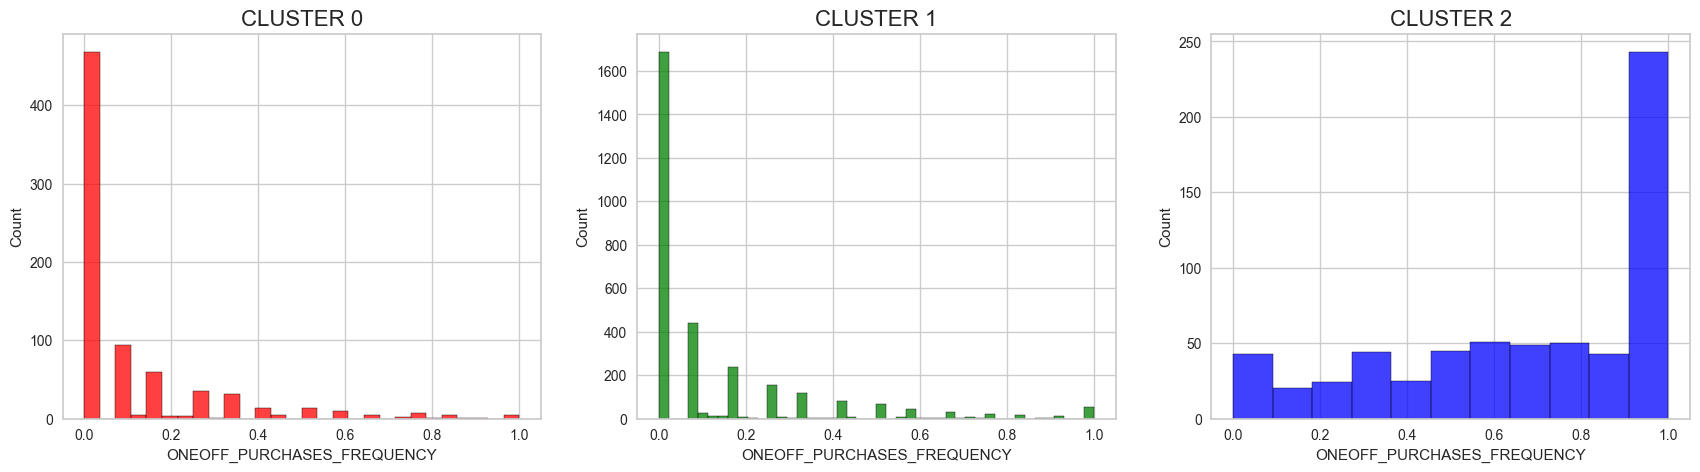

In [90]:
#plot comparison one off purchase from each CLUSTER
plt.figure(figsize=(21,5))
plt.subplot(1,3,1)
sns.histplot(CLUSTER_0['ONEOFF_PURCHASES_FREQUENCY'], color = 'red')
plt.title('CLUSTER 0', size = 16)
plt.subplot(1,3,2)
sns.histplot(CLUSTER_1['ONEOFF_PURCHASES_FREQUENCY'], color='green')
plt.title('CLUSTER 1', size = 16)
plt.subplot(1,3,3)
sns.histplot(CLUSTER_2['ONEOFF_PURCHASES_FREQUENCY'], color='blue')
plt.title('CLUSTER 2', size = 16)

# 9 - Model Inference

In [83]:
data_inf

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0   312.636004           1.000000    3866.29            808.12   
1   360.671491           1.000000    3956.64              0.00   
2    30.692503           0.454545     205.06              0.00   
3  2817.590920           1.000000      37.92              0.00   
4  7803.071972           1.000000    1000.55              0.00   
5    64.907748           0.727273     547.28            130.00   
6  1362.418281           1.000000    1477.44            900.00   
7   284.433780           0.363636     212.92              0.00   
8  8040.732429           1.000000       0.00              0.00   
9   772.647723           0.875000       0.00              0.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                 3058.17      0.000000             1.000000   
1                 3956.64    148.682192             1.000000   
2                  607.76      0.000000             0.916667   
3                   37.92      0.000000             0.166667   
4                 1000.55   1490.239239             1.000000   
5                  417.28      0.000000             0.333333   
6                  577.44    451.968387             1.000000   
7                  212.92      0.000000             0.833333   
8                    0.00   3500.334072             0.000000   
9                    0.00    970.371120             0.000000   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    1.000000                          1.000000   
1                    0.000000                          1.000000   
2                    0.000000                          1.000000   
3                    0.000000                          0.166667   
4                    0.000000                          1.000000   
5                    0.083333                          0.250000   
6                    0.111111                          0.888889   
7                    0.000000                          0.833333   
8                    0.000000                          0.000000   
9                    0.000000                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0             95        7500.0   
1                0.083333                 1             12        4500.0   
2                0.000000                 0             35        4500.0   
3                0.000000                 0              2        3000.0   
4                0.333333                 6             35        8000.0   
5                0.000000                 0              4        2500.0   
6                0.111111                 1             10        1500.0   
7                0.000000                 0             15        1500.0   
8                0.333333                21              0       12000.0   
9                0.125000                 1              0        2500.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0  3688.890803        190.886140              0.75      12  
1  4013.483114       3662.236048              0.25      12  
2   163.982192         55.660981              0.00      12  
3   755.313452       1167.316335              0.00      12  
4  3478.320794       2722.218432              0.00      12  
5  1095.179494        126.509061              1.00      12  
6   559.095981       1058.844790              0.00       9  
7  1202.791804        150.107024              0.00      12  
8  2709.478892       2044.554634              0.00      12  
9   125.862157        209.002905              0.00       8

### preprocessing data inference

In [84]:
scaler = StandardScaler()
data_inf_scaler = scaler.fit_transform(data_inf)

In [85]:
# Convert to dataframe
data_inf_scaler = pd.DataFrame(data_inf_scaler, columns=data.columns)

In [86]:
data_inf_scaler = pca_9.fit_transform(data_inf_scaler)

In [87]:
# Convert to dataframe
data_inf_fix = pd.DataFrame(data_inf_scaler, columns=['PCA_' + str(i) for i in range(1, 10)])

In [88]:
pred_inf = kmeans.predict(data_inf_fix)

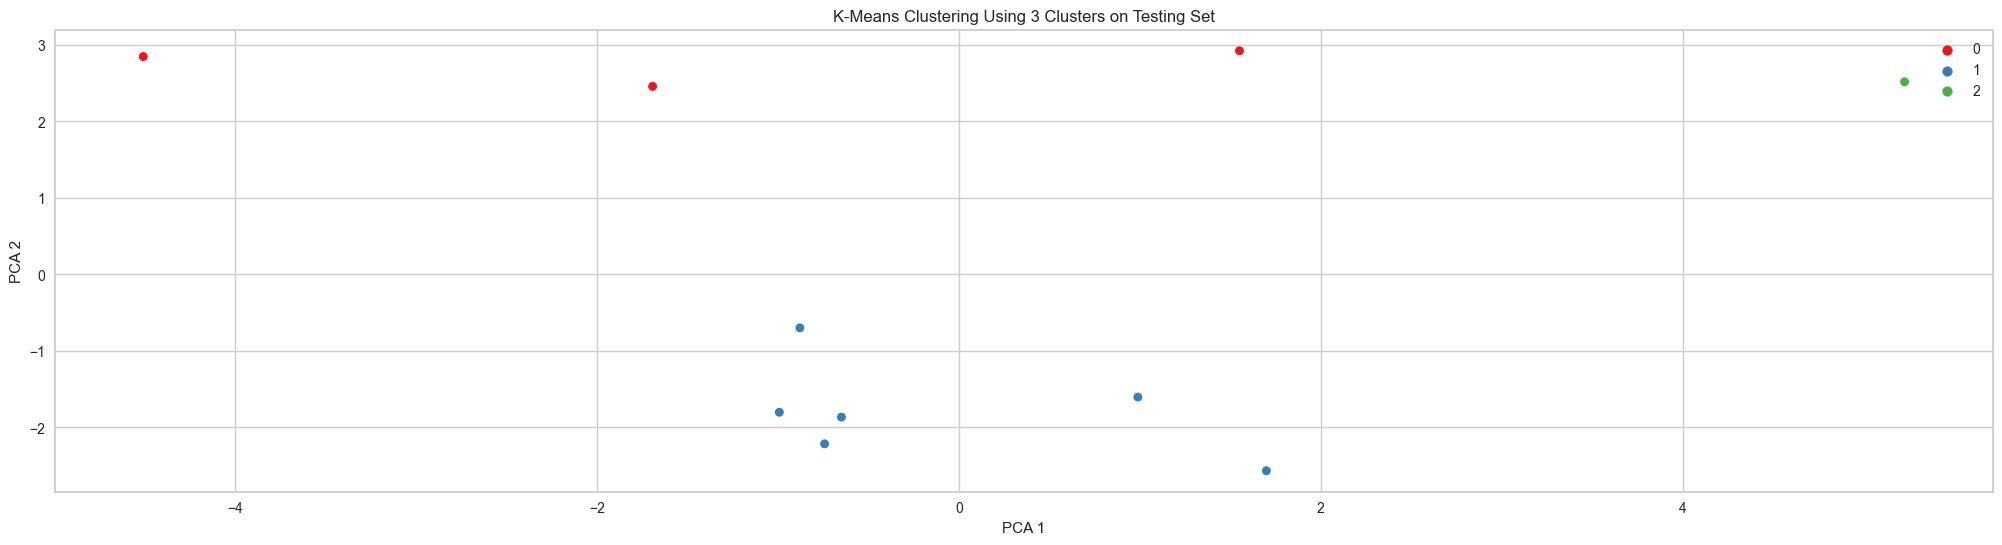

In [89]:
plt.figure(figsize=(25, 6))
sns.scatterplot(x='PCA_1', y='PCA_2', hue=pred_inf, data=data_inf_fix, palette='Set1')
plt.title('K-Means Clustering Using 3 Clusters on Testing Set')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

# 10 - Pengambilan Kesimpulan

### Overall analis

Based on EDA:
- Dataset yang digunakan adalah data credit-card-information yang terdiri dari 4475 dengan jumlah kolom 18
- credit limit paling banyak dibawah 15.000 dan balance dibawah 8.000
- balance frequency ada sekitar 85% yang sering diperbarui, asumsi terjadi pada saat ada transaksi
- purchases frequency antara yang sering menggunakan dan jarang sama
- banyak pengguna yang tidak membayar lunas dilihat dari jumlah pembayran hampir 10.000 namun banyak yang membayar dengan minimum bayar dibawah 5.000
- sebagian besar menggunakan tenor 12 bulan

Based on Model:
- Dari ketiga model yang digunakan diperoleh hasil evaluasi 
    - **K-Means** : diperoleh silhoutte score paling tinggi 0.266 dengan jumlah cluster 3. 
    - **DBSCAN** : diperoleh silhoutte score paling tinggi - 0.006 dengan epsilon 1.0. model ini kurang optimal karena silhoutte score terlalu rendah dan banyaknya data yang saling menumpuk
    - **Agglomerative** : diperoleh silhoutte score paling tinggi 0.207 dengan jumlah cluster 2. model ini kurang optimal karna adanya penumpukan dititik 0.
    - Dari 3 model tersebut akan menngunakan **K-Means**, karena K-Means dapat mengelompokan data lebih optimal dan lebih cocok dengan data ini dan untuk meminimalkan variasi antara data yang ada didalam suatu cluster dan memaksimalkan variasi dengan data yang ada di cluster lainnya. kelemahannya sensitif terhadap outlier.

Based on Cluster:
- Cluster 0 **Pengguna Jarang**
    Pengguna kartu kredit pada kategori sebanyak 768, kategori ini termasuk yang jarang menggunakan kartu kredit, namun memiliki credit limin yang tinggi yaitu 6.687 atau hampir tidak pernah menggunakannya baik itu cicilan maupun tunai. saya berasumsi bahwa kategori ini senang menabung atau investasi.

- Cluster 1 **Pengguna Sedang**
    Pengguna kartu kredit paling banyak masuk ke kategori sedang, dilihat jumlahnya yaitu 3.070 pengguna ini sangat mendominasi dengan kategori yang lain. untuk transaksi seimbang antara yang jarang dan sering melakukan transaksi. credit limit pada kategori ini paling kecil yaitu 3.240 dengan balance yang kecil juga yaitu 811 dan metode pembayaran yang paling banyak dilakukan adalah cicilan. sehingga saya asumsikan pada kategori ini pengguna menggunakan kartu kredit untuk barang barang mahal kemudian membayarkan dengan cicilan

- Cluster 2 **Pengguna Berat**
    - pengguna yang masuk kategori ini paling sedikit yaitu 637
    - pengguna sering menggunakan dengan cara sekali bayar
    - rata-rata credit limit pada kelompok ini yang paling tinggi yaitu 7890
    - pengguna ini juga yang paling sering melakukan pembelian 
    Meskipun kategori ini sedikit hanya 637 tetapi Pengguna ini paling sering melakukan transaksi dilihat berdasarkan jumlah purchasing yang paling tinggi yaitu 4.158 dan memiliki credit limit yang paling tinggi. Jenis pembayaran yang dilakukan adalah sekali bayar. sehingga saya asumsikan pengguna ini menggunakan kartu kredit untuk kebutuhan sehari hari, mereka bukan bertujuan untuk berhutang atau mencicil melainkan hanya untuk menunda pembayaran.

# Conceptual Problemns

*Jawab pertanyaan berikut:*

1. Apakah yang dimaksud dengan `inertia` pada algoritma K-Means ?
> inertia : untuk meminimalkan variance atau biasa disebut within-cluster sum of squares (wcss)
2. Jelaskan yang dimaksud dengan Elbow Method (alasan penggunaan, cara penggunaan, kelemahan/kelebihan, dll) !
> Metode yang digunakan untuk menemukan number optimum untuk cluster(nilai k), metode visualisasi selisih Within Sum of Square
Error (WSSE) yang membentuk sudut siku pada grafik, keunggulan: waktu yang lebih efisien, Metode elbow juga sangat mudah diimplementasikan dengan cara melihat grafik dari nilai k yang akan diinputkan. Nilai fungsi k yang akan dibandingkan pada metode elbow adalah dengan melihat nilai SSE (Sum of Square Error) pada nilai cluster yang ditentukan. Hasil jumlah cluster k terbaik akan
dijadikan dasar untuk melakukan proses clustering
3. Jelaskan perbedaan masing-masing algoritma clustering yang anda gunakan dalam kasus ini !
> - K-Means: 
    - algoritma berbasis centroid
    - membuat seluruh titik data cluster semirip mungkin sambil menjaga setiap cluster itu berbeda
    - semakin sedikin variansi yang dimiliki dalam cluster, semakin homogen titik datanya dalam cluster yang sama
    - kelemahan sensitif terhadap outlier
> - DBSCAN : 
    - clustering berdasarkan kepadatan
    - outlier tidak dianggap sebagai clustering
    - membutuhkan 2 parameter antara lain epsilon(menentukan seberapa dekat titik satu sama lain untuk dianggap bagian dari sebuah cluster), min points/sample (jumlah minimum data untuk membentuk daerah dense/padat)
> - Agglomerative
    - metode pengelompokan button up
    - prosesnya: tetapkan setiap pengamatan ke clusternya sendiri, hitung kesamaan antara masing masing cluster dan gabungkan dua cluster yang mirip, proses berulang sampai hanya ada satu cluster yang tersisa.

### Referensi

- https://binus.ac.id/bandung/creativepreneurship/2021/11/08/segmentasi-konsumen/#:~:text=Segmentasi%20pelanggan%20adalah%20proses%20membagi,berbeda%20ke%20segmen%20yang%20berbeda. 
- https://www.kaggle.com/code/rizkynindra/cc-clustering
- https://www.jurnal.id/id/blog/cara-mudah-tentukan-segmentasi-pasar/
- https://www.kaggle.com/code/ahmetarslann/clustering-credit-card-client